
# **Marketing Analysis Capstone**



### **The objectives: Using Unsupervised Learning ideas such as Dimensionality Reduction and Clustering, the objective is to come up with the best possible customer segments using the given customer dataset **

 - 

------------------------------
## **Data Dictionary**
------------------------------

The dataset contains the following features:

1. ID: Unique ID of each customer
2. Year_Birth: Customer’s year of birth
3. Education: Customer's level of education
4. Marital_Status: Customer's marital status
5. Kidhome: Number of small children in customer's household
6. Teenhome: Number of teenagers in customer's household
7. Income: Customer's yearly household income in USD
8. Recency: Number of days since the last purchase
9. Dt_Customer: Date of customer's enrollment with the company
10. MntFishProducts: The amount spent on fish products in the last 2 years
11. MntMeatProducts: The amount spent on meat products in the last 2 years
12. MntFruits: The amount spent on fruits products in the last 2 years
13. MntSweetProducts: Amount spent on sweet products in the last 2 years
14. MntWines: The amount spent on wine products in the last 2 years
15. MntGoldProds: The amount spent on gold products in the last 2 years
16. NumDealsPurchases: Number of purchases made with discount
17. NumCatalogPurchases: Number of purchases made using a catalog (buying goods to be shipped through the mail)
18. NumStorePurchases: Number of purchases made directly in stores
19. NumWebPurchases: Number of purchases made through the company's website
20. NumWebVisitsMonth: Number of visits to the company's website in the last month
21. AcceptedCmp1: 1 if customer accepted the offer in the first campaign, 0 otherwise
22. AcceptedCmp2: 1 if customer accepted the offer in the second campaign, 0 otherwise
23. AcceptedCmp3: 1 if customer accepted the offer in the third campaign, 0 otherwise
24. AcceptedCmp4: 1 if customer accepted the offer in the fourth campaign, 0 otherwise
25. AcceptedCmp5: 1 if customer accepted the offer in the fifth campaign, 0 otherwise
26. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
27. Complain: 1 If the customer complained in the last 2 years, 0 otherwise


### **Loading Libraries**

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# To compute distances
from scipy.spatial.distance import cdist

# To perform K-means clustering and compute Silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Importing PCA
from sklearn.decomposition import PCA

# To encode the variable
from sklearn.preprocessing import LabelEncoder

# Importing TSNE
from sklearn.manifold import TSNE

# To perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# To compute distances
from scipy.spatial.distance import pdist

# To import K-Medoids
from sklearn_extra.cluster import KMedoids

from sklearn.cluster import DBSCAN

# To import Gaussian Mixture
from sklearn.mixture import GaussianMixture

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

### **Load the data**

In [2]:
# loading the dataset
data = pd.read_csv("marketing_campaign.csv")

### **Shape of the data**

In [3]:
# Print the shape of the data
data.shape

(2240, 27)

#### **Observations and Insights:
- There are 2240 observations and 27 columns in our data 

### **Understand the data by observing a few rows**

In [4]:
# View first 5 rows
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [5]:
# View last 5 rows 
data.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,5,10,3,0,0,0,0,0,0,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,1,4,7,0,0,0,0,0,0,1


### **Check the data types and and missing values of each column** 

In [6]:
# Check the datatypes of each column. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
# Find the percentage of missing values in each column of the data
data.isnull().sum() * 100 / len(data)

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

#### **Observations and Insights: 
- There are only missing values for income and it is 1.07% of the total values for Income


**Dropping the ID column**

In [8]:
# Remove ID column from data. 
data.drop(columns = ['ID'], inplace = True)

## **Exploratory Data Analysis**

### **Explore the summary statistics of numerical variables**

In [9]:
# Explore basic summary statistics of numeric variables. 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0


#### **Observations and Insights: 
- There are some maximum values(ex. Income, MntMeatProducts, MntWines, etc) that are far higher than the mean which indicates possible outliers
- The standard deviation for most of the amount of products sold is quite high which could mean a high variance 
- Income has a incredibly high max value, very likely an outlier 
- Number of store purchases is higher on average than other ways but the max value is less, might show less variance in its nature and more consistent 
- Customers seemed to have accepted the offer in Campaign 2 the least 
- High standard deviation for response 

### **Explore the summary statistics of all categorical variables and the number of unique observations in each category**

In [10]:
# List of the categorical columns in the data
cols = ["Education", "Marital_Status", "Kidhome", "Teenhome", "Complain"]

**Number of unique observations in each category**

In [11]:
for column in cols:
    print("Unique values in", column, "are :")
    print(data[column].nunique())
    print("*" * 50)

Unique values in Education are :
5
**************************************************
Unique values in Marital_Status are :
8
**************************************************
Unique values in Kidhome are :
3
**************************************************
Unique values in Teenhome are :
3
**************************************************
Unique values in Complain are :
2
**************************************************


#### **Observations and Insights: 
- There are the greatest unique values in marital status (8) while education has 5 
- These are high compared to the others like Kidhome and Teenhome which are lower
- Some marital status groups might be able to be combined with kidhome and teenhome 

### **Replace  the "2n Cycle" category with "Master" in Education and "Alone", "Absurd, and "YOLO" with "Single" in Marital_Status**

In [12]:
# Replace the category "2n Cycle" with the category "Master"

data["Education"].replace("2n Cycle", "Master", inplace = True)  



In [13]:
# Replace the categories "Alone", "Abusrd", "YOLO" with the category "Single"

data["Marital_Status"].replace("Alone", "Single", inplace = True)
data["Marital_Status"].replace("Absurd", "Single", inplace = True)
data["Marital_Status"].replace("YOLO", "Single", inplace = True)




## **1. Univariate Analysis - Numerical Data**
Histograms help to visualize and describe numerical data. We can also use other plots like box plot to analyze the numerical columns.

#### Histogram for the feature 'Income' to understand the distribution and outliers, if any.

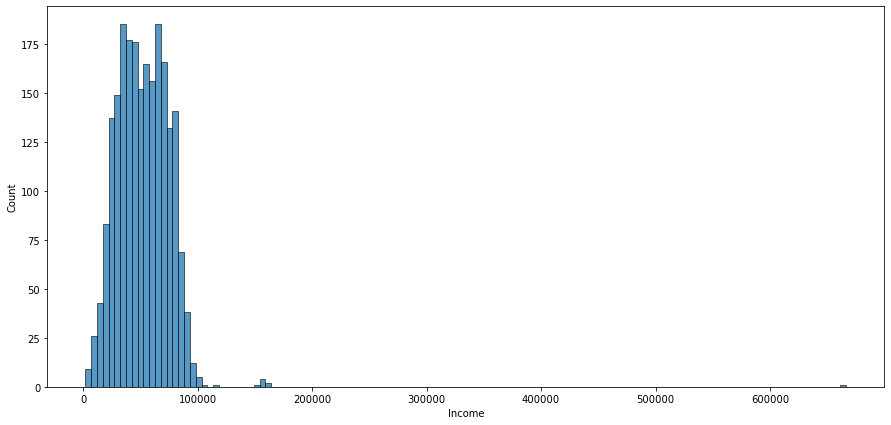

In [14]:
# Create histogram for the Income feature

plt.figure(figsize=(15, 7))
sns.histplot(x='Income', data=data)
plt.show()

**We could observe some extreme value on the right side of the distribution of the 'Income' feature. 

<AxesSubplot:xlabel='Income'>

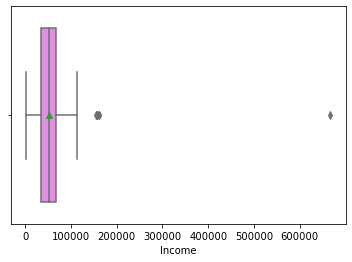

In [15]:
# Plot the boxplot

sns.boxplot(data=data, x="Income", showmeans=True, color="violet")

#### **Observations and Insights: 
- There are outliers that are visible in the histogram and boxplot that are greatly skewing the plots
- One outlier is much more extreme than the others

In [16]:
# Calculating the upper whisker for the Income variable

Q1 = data.quantile(q=0.25)                          # Finding the first quartile

Q3 = data.quantile(q=0.75)                         # Finding the third quartile

IQR = Q3 - Q1                                    # Finding the Inter Quartile Range

upper_whisker = (Q3 + 1.5 * IQR)['Income']         # Calculating the Upper Whisker for the Income variable

print(upper_whisker)                                # Printing Upper Whisker

118350.5


In [ ]:
# Check the observations with extreme value for the Income variable
data[data.Income > upper_whisker]

In [18]:
# Check the 99.5% percentile value for the Income variable
data.quantile(q=0.995)['Income']

102145.75000000003

#### **Observations and Insights:

- The 99.5 percentile for Income is 102,145.75 dollars which approximately 3 standard deviations 

In [19]:
# Dropping observations identified as outliers 
data.drop(index=[164,617,655,687,1300,1653,2132,2233], inplace=True) 


# Pass the indices of the observations (separated by a comma) to drop them

**Distribution of the Income variable after dropping outliers.**

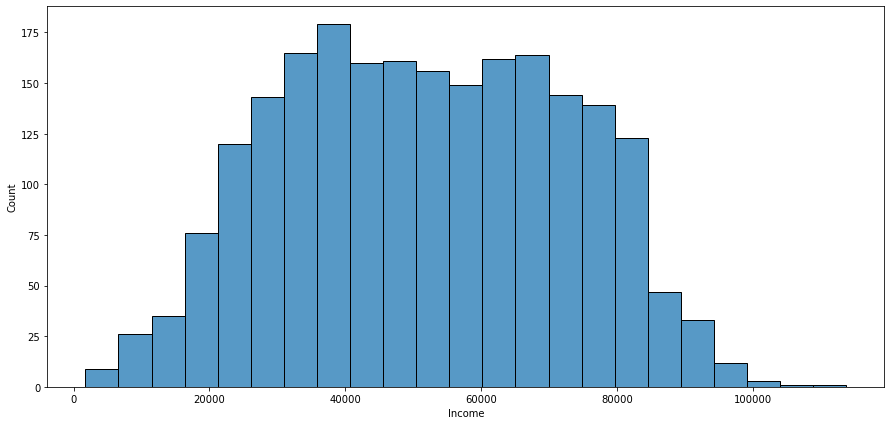

In [20]:
# Plot histogram and 'Income'
plt.figure(figsize=(15, 7))
sns.histplot(x="Income", data= data)
plt.show()

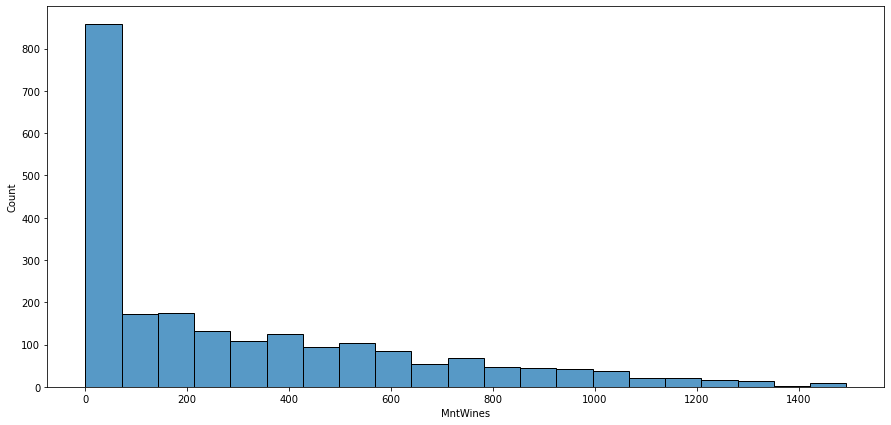

In [21]:
# Plot the histogram for 'MntWines'
plt.figure(figsize=(15, 7))
sns.histplot(x="MntWines", data= data)
plt.show()

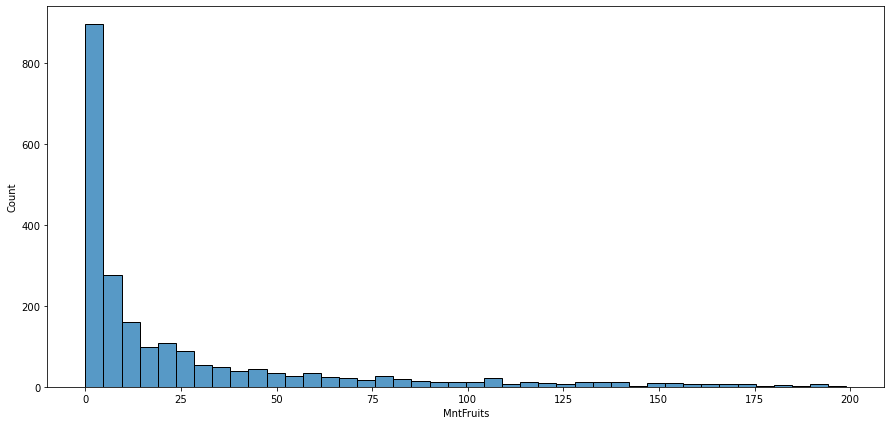

In [22]:
# Plot the histogram for 'MntFruits'
plt.figure(figsize=(15, 7))
sns.histplot(x="MntFruits", data= data)
plt.show()

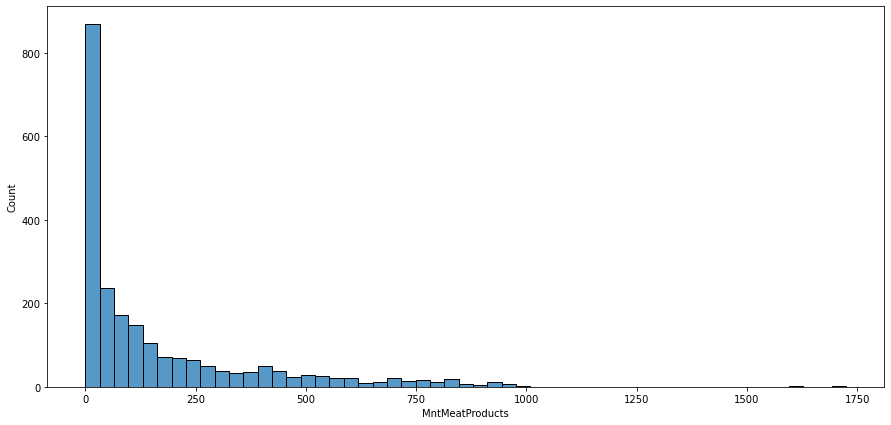

In [23]:
# Plot the histogram for 'MntMeatProducts' 
plt.figure(figsize=(15, 7))
sns.histplot(x="MntMeatProducts", data= data)
plt.show()

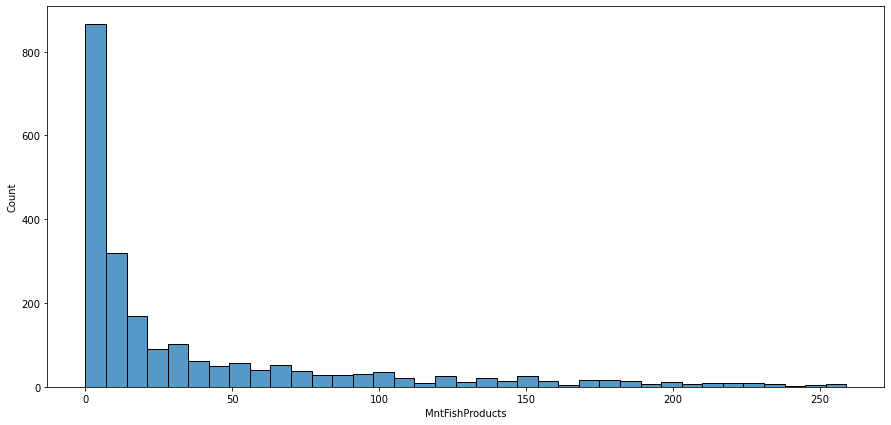

In [24]:
# Plot the histogram for 'MntFishProduct'
plt.figure(figsize=(15, 7))
sns.histplot(x="MntFishProducts", data= data)
plt.show()

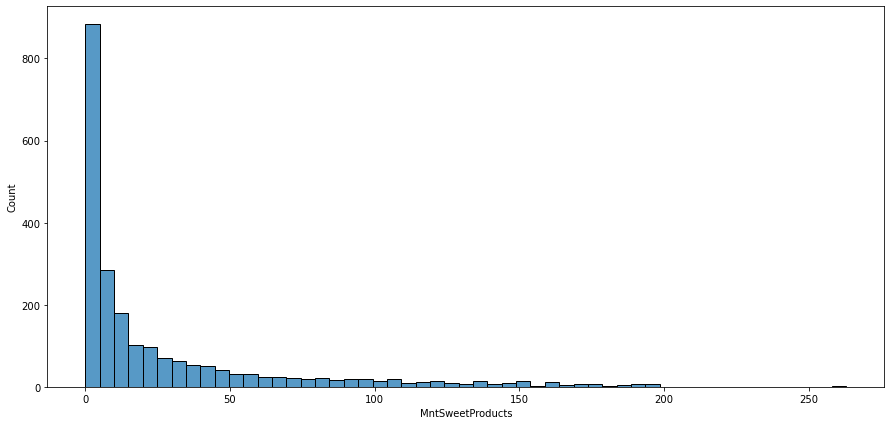

In [25]:
# Plot the histogram for 'MntSweetProducts'
plt.figure(figsize=(15, 7))
sns.histplot(x="MntSweetProducts", data= data)
plt.show()

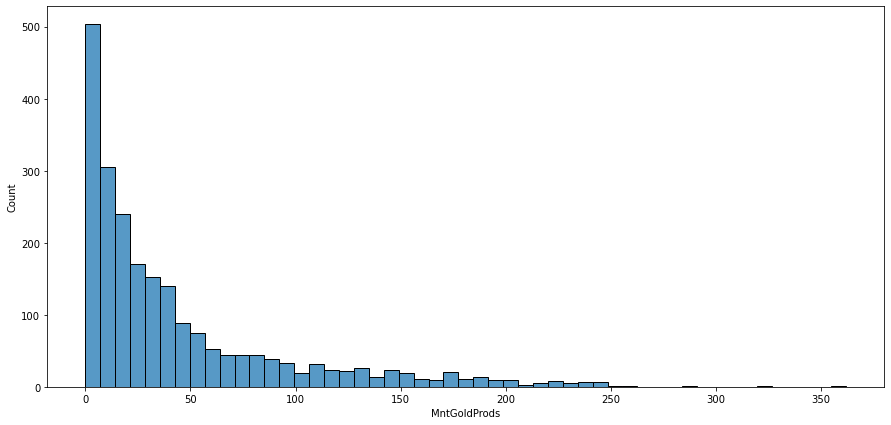

In [26]:
# Plot the histogram for 'MntGoldProducts'
plt.figure(figsize=(15, 7))
sns.histplot(x="MntGoldProds", data= data)
plt.show()

#### **Observations and Insights for all the plots: 

- The Income histogram plot after removing the outliers lost its heavy right skew and resembles more of a normal distribution now 
- The histograms for all of the products are greatly right skewed 

## **2. Univariate analysis - Categorical Data**

In [27]:
def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z])                                          # Length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[z],palette='Paired',order = data[z].value_counts().index)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # Percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05                  # Width of the plot
        y = p.get_y() + p.get_height()                            # Height of the plot
        
        ax.annotate(percentage, (x, y), size = 12)                # Annotate the percentage 
    
    plt.show()                                                    # Show the plot

#### Let us plot barplot for the variable Marital_Status.

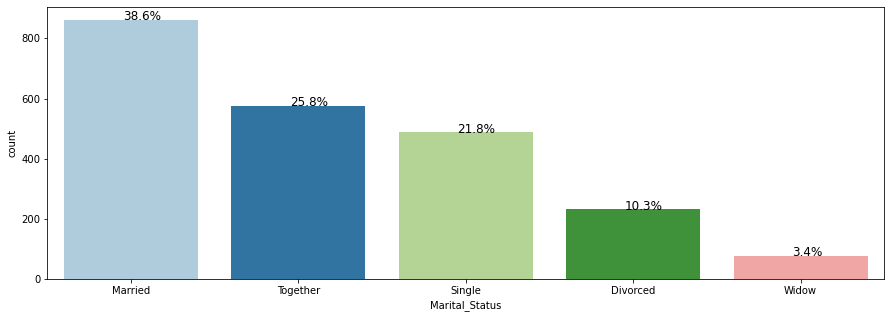

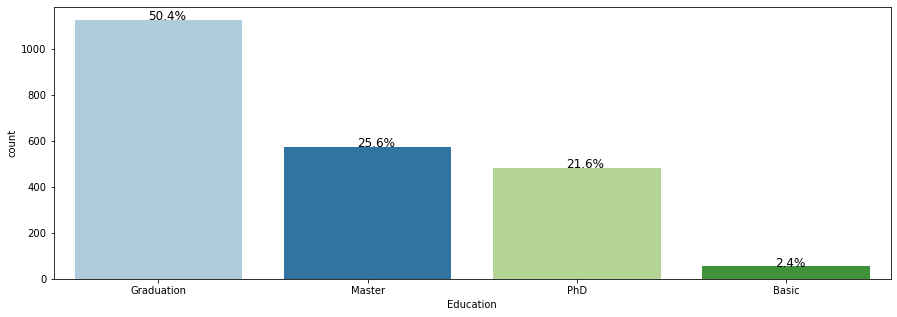

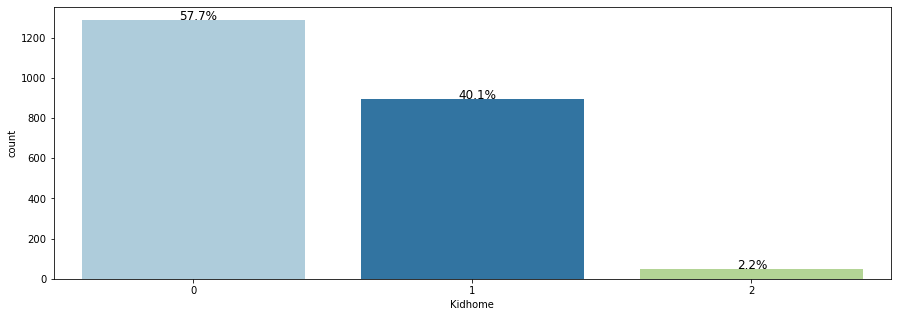

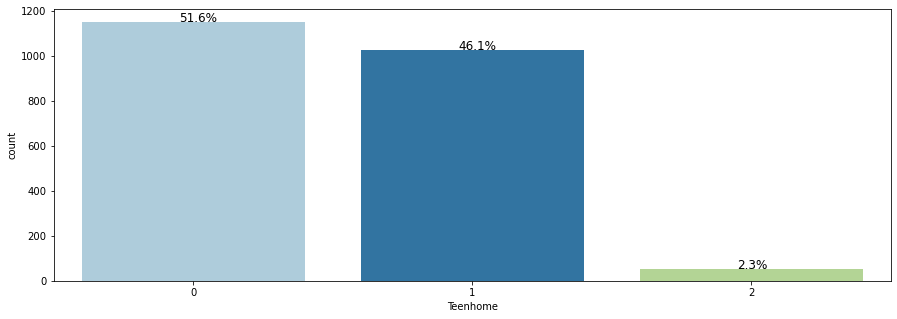

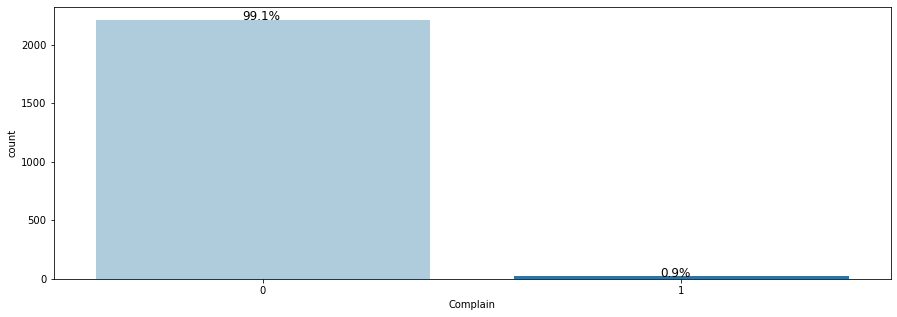

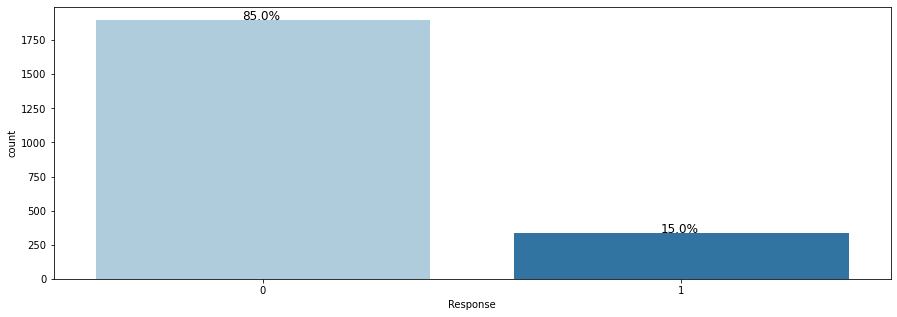

In [28]:
# Bar plot for 'Marital_Status'
perc_on_bar('Marital_Status')

perc_on_bar('Education')

perc_on_bar('Kidhome')

perc_on_bar('Teenhome')

perc_on_bar('Complain')

perc_on_bar('Response')

#### **Note:** Explore for other categorical variables like Education, Kidhome, Teenhome, Complain.

#### **Observations and Insights from all plots: 

- Nearly 65% of the customers are either married are together, and 22% are single. 
- 50% of customers had graduated and another 46% of the customers had done higher education (Masters or PhD), this only leaves a very small 2% basic education showing the customer base is fairly highly educated on average 
- Approximately half of all customers have 0 kids, ~40% have 1 small and 1 teen, it is unlikely customers have 2 small children or 2 teens (just 2%)
- There has been very few complaints 
- There has only been a 15% response/acceptance rate of the last campaign 

## **Bivariate Analysis**

We have analyzed different categorical and numerical variables. Check how different variables are related to each other.

### **Correlation Heat map**
Heat map can show a 2D correlation matrix between numerical features.

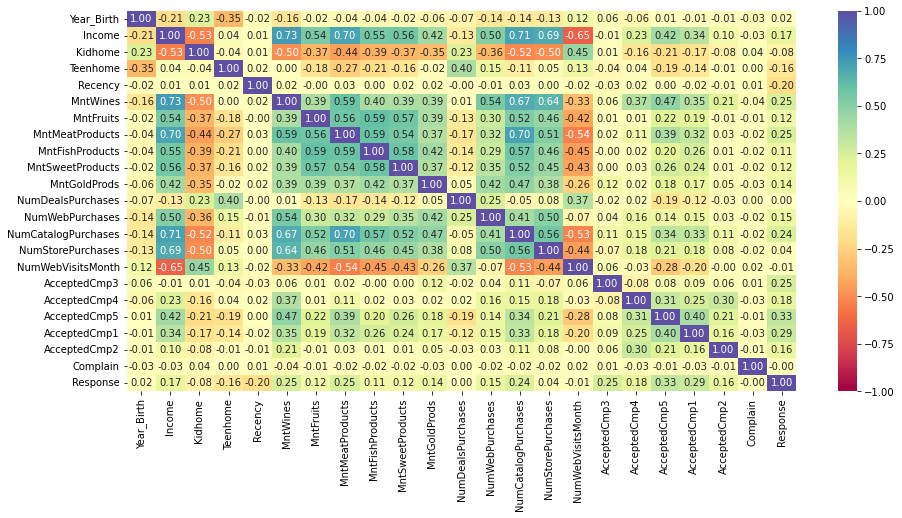

In [29]:
plt.figure(figsize=(15, 7))                                                        # Setting the plot size
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")  # Plotting the correlation plot
plt.show()

#### **Observations and Insights: 

- The amount spent on products, especially wines and meats, has a strong positive correlation with Income
- Income strongly positively correlates with Catalog and Store purchases but has a strong negative correlation with Web visits despite a positive correlation with web purchases
- Kidhome negatively correlates with amount spent on all products, especially wine and meats
- Meat and Wine have a strong positive correlation, could be that they are bought together
- Purhases with discounts positively correlates to customers with children/teens 
- Campaigns 5 and 1 positively correlated with income, these campaigns may have done a good job catering to higher income customers

**The above correlation heatmap only shows the relationship between numerical variables. Check the relationship of numerical variables with categorical variables.**

### **Education Vs Income**

AxesSubplot(0.125,0.125;0.775x0.755)


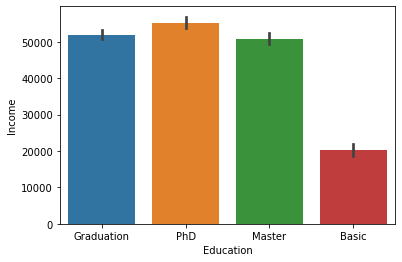

In [30]:
print(sns.barplot(x='Education', y='Income', data=data))

#### **Observations and Insights: 
- Income is higher for those with higher education than basic
- Income is similar for the rest above basic education

### **Marital Status Vs Income**

AxesSubplot(0.125,0.125;0.775x0.755)


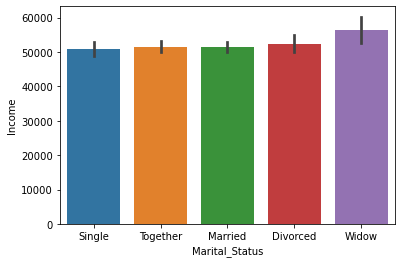

In [31]:
# Plot the bar plot for Marital_Status and Income
print(sns.barplot(x='Marital_Status', y='Income', data=data))

#### **Observations and Insights: 
- Widows have the highest income out of the various marital statuses
- All the incomes are fairly similar for the different groups except widow

### **Kidhome Vs Income**

AxesSubplot(0.125,0.125;0.775x0.755)


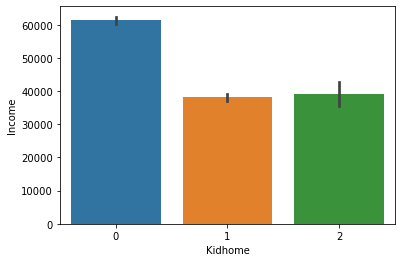

In [32]:
# Plot the bar plot for Kidhome and Income
print(sns.barplot(x='Kidhome', y='Income', data=data))

#### **Observations and Insights: 

- The income is noticeably higher for customers that have zero children 
- Income is fairly similar for 1 and 2 kids with 2 kids being slightly higher

**Next,visualize the relationship between two categorical variables.**

### **Marital_Status Vs Kidhome**

<AxesSubplot:xlabel='Marital_Status'>

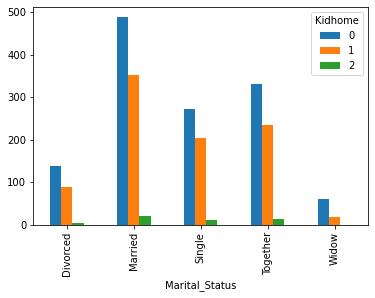

In [33]:
# Plot the bar plot for Marital_Status and Kidhome
pd.crosstab(data.Marital_Status,data.Kidhome).plot(kind='bar',stacked=False)

#### **Observations and Insights: 
- The proportions of 0,1,2 kids does not seem to be much different between married, single, together, or divorced couples 
- Married are the most common customers 

## **Feature Engineering and Data Processing**



### **Age** 

In [34]:

data["Age"] = 2016 - pd.to_datetime(data.Year_Birth, format="%Y").apply(lambda x: x.year) 

# Sorting the values in ascending order 
data["Age"].sort_values()                                         

1170     20
46       20
696      21
747      21
1850     21
       ... 
424      75
1950     76
192     116
339     117
239     123
Name: Age, Length: 2232, dtype: int64

#### **Observations and Insights: 
- There seems to be 3 customers that have very large ages that are not very reasonable

In [35]:
# Drop the observations with age > 115
data.drop(index=[192,339,239], inplace=True)

**Check the distribution of age in the data.**

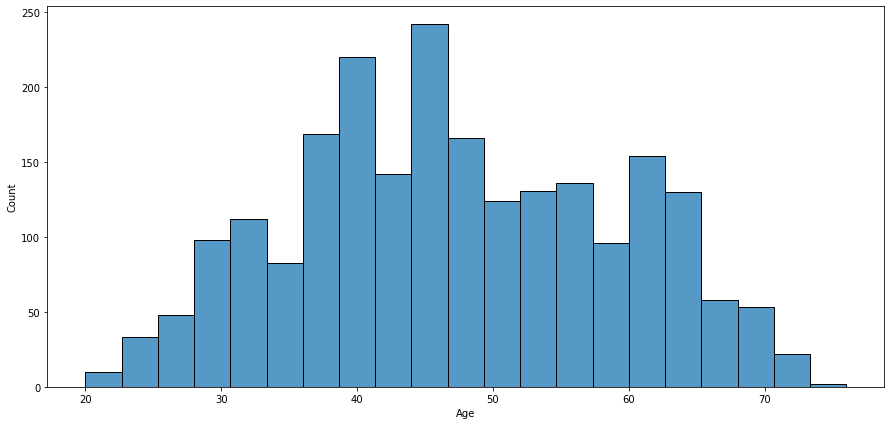

In [36]:
# Plot histogram to check the distribution of age
plt.figure(figsize=(15, 7))
sns.histplot(x="Age", data= data)
plt.show()

#### **Observations and Insights: 
- After the 3 outliers were taken out, this seems to be a fairly normal distribution with the most customers being between 40-50 years old 

### **Kids** 
* Create feature "Kids" indicating the total kids and teens in the home.

In [37]:
# Add Kidhome and Teenhome variables to create the new feature called "Kids"
data["Kids"] = data.Kidhome + data.Teenhome

### **Family Size**
* Create a new variable called 'Family Size' to find out how many members each family has by looking at the Marital_Status variable, and see what are the categories.

In [38]:
# Check the unique categories in Marial_Status
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow'], dtype=object)

* Can combine the sub-categories Single, Divorced, Widow as "Single" and we can combine the sub-categories Married and Together as "Relationship" 
* Create a new variable called "Status" and assign values 1 and 2 to categories Single and Relationship, respectively.
* Use the Kids (calculated above) and the Status column to find the family size.

In [39]:
# Replace "Married" and "Together" with "Relationship"
data["Marital_Status"].replace(["Married", "Together"], "Relationship", inplace = True)

In [40]:
# Replace "Divorced" and "Widow" with "Single"
data["Marital_Status"].replace(["Divorced", "Widow"], "Single", inplace = True)

In [41]:
# Create a new feature called "Status" by replacing "Single" with 1 and "Relationship" with 2 in Marital_Status
data["Status"] = data["Marital_Status"].replace({"Single": 1, "Relationship": 2}) 




In [42]:
# Add two variables Status and Kids to get the total number of persons in each family
data["Family_Size"] = data.Status + data.Kids

### **Expenses** 
* Make new feature called "Expenses", indicating the total amount spent by the customers in various products over the span of two years.

In [43]:
# Create a new feature
# Add the amount spent on each of product 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
data["Expenses"] = data.MntWines + data.MntFruits + data.MntMeatProducts + data.MntFishProducts + data.MntSweetProducts + data.MntGoldProds




### **Total Purchases**
* Create a new feature called "NumTotalPurchases", indicating the total number of products purchased by the customers.

In [44]:
# Create a new feature
# Add the number of purchases from each channel 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'
data["NumTotalPurchases"] = data.NumDealsPurchases + data.NumWebPurchases + data.NumCatalogPurchases + data.NumStorePurchases




### **Engaged in Days**
* Create a new feature called "Engaged in days", indicating how long the customer has been with the company.

In [45]:
# Converting Dt_customer variable to Python date time object
data["Dt_Customer"] = pd.to_datetime(data.Dt_Customer) 

**Check the max and min of the date.**

In [46]:
# Check the minimum of the date

data["Dt_Customer"].min()

Timestamp('2012-01-08 00:00:00')

In [47]:
# Check the maximum of the date

data["Dt_Customer"].max()

Timestamp('2014-12-06 00:00:00')

In [48]:
 # Assigning date to the day variable
data["day"] = "01-01-2015"                         

# Converting the variable day to Python datetime object
data["day"] = pd.to_datetime(data.day)              

In [49]:
data["Engaged_in_days"] = (data["day"] - data["Dt_Customer"]).dt.days     

### **TotalAcceptedCmp**
* Create a new feature called "TotalAcceptedCmp" that shows how many offers customers have accepted.

In [50]:
# Add all the campaign related variables to get the total number of accepted campaigns by a customer
# "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"
data["TotalAcceptedCmp"] = data.AcceptedCmp1 + data.AcceptedCmp2 + data.AcceptedCmp3 + data.AcceptedCmp4 + data.AcceptedCmp5 + data.Response





### **AmountPerPurchase**
* Create a new feature called "AmountPerPurchase" indicating the amount spent per purchase.

In [51]:
# Divide the "Expenses" by "NumTotalPurchases" to create the new feature AmountPerPurchase 
data['AmountPerPurchase'] = data.Expenses / data.NumTotalPurchases

**Maximum value of the AmountPerPurchase.**

In [ ]:
# Check the max value
data["AmountPerPurchase"].max()

In [53]:
# Find how many observations have NumTotalPurchases equal to 0
data[data.NumTotalPurchases < 1]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Age,Kids,Status,Family_Size,Expenses,NumTotalPurchases,day,Engaged_in_days,TotalAcceptedCmp,AmountPerPurchase
981,1965,Graduation,Single,4861.0,0,0,2014-06-22,20,2,1,...,51,0,1,1,6,0,2015-01-01,193,0,inf
1524,1973,Graduation,Single,3502.0,1,0,2013-04-13,56,2,1,...,43,1,1,2,5,0,2015-01-01,628,0,inf


In [54]:
# Drop the observations with NumTotalPurchases equal to 0, using their indices
data.drop(index=[981,1524], inplace=True) 


**Check the distribution of values in AmountPerPurchase column.**

In [55]:
# Check the summary statistics of the AmountPerPurchase variable 
data["AmountPerPurchase"].describe().T

count    2227.000000
mean       33.274270
std        45.040897
min         0.533333
25%         9.714286
50%        23.352941
75%        45.281773
max      1679.000000
Name: AmountPerPurchase, dtype: float64

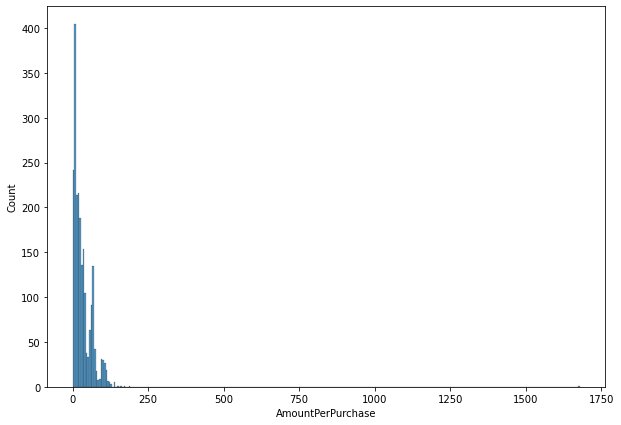

In [56]:
# Plot the histogram for the AmountPerPurchas variable
plt.figure(figsize=(10, 7))
sns.histplot(x="AmountPerPurchase", data= data)
plt.show()

#### **Observations and Insights: 
- The AmountPerPurchase plot is right skewed with a lot of the data falling in 0-100 range
- There is one output at 1600 that is an extreme max value

### **Imputing Missing Values**

In [57]:
# Impute the missing values for the Income variable with the median
data.Income.fillna(data.Income.median(), inplace = True)



**Post data preprocessing, need to visualize new features against the new income variable we have after imputing missing values.**

### **Income Vs Expenses**

Text(0, 0.5, 'Expenses')

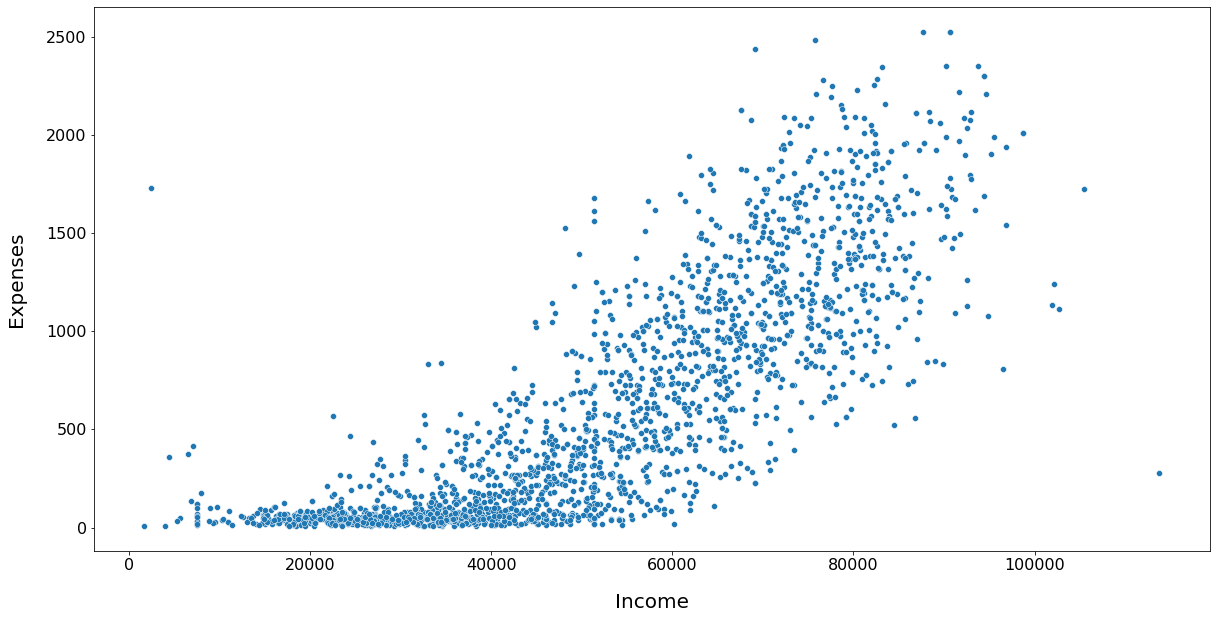

In [58]:
# Plot the scatter plot with Expenses on Y-axis and Income on X-axis  

plt.figure(figsize=(20, 10))                                    # Setting the plot size

sns.scatterplot(x = data.Income, y = data.Expenses)                                    
plt.xticks(fontsize=16)                                         # Font size of X-label

plt.yticks(fontsize=16)                                         # Font size of Y-label

plt.xlabel("Income", fontsize=20, labelpad=20)                  # Title of X-axis

plt.ylabel("Expenses", fontsize=20, labelpad=20)                # Title of Y-axis

#### **Observations and Insights: 
- The general trend is a positive correlation between Income and Expenses 
- This scatterplot also has an exponential shape to it 

### **Family Size Vs Income**

AxesSubplot(0.125,0.125;0.775x0.755)


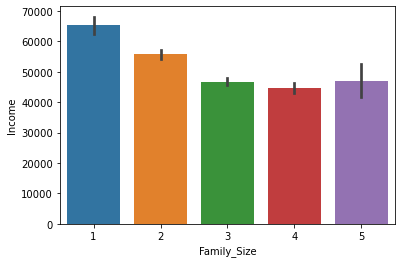

In [59]:
# Plot the bar plot for Family Size on X-axis and Income on Y-axis
print(sns.barplot(x='Family_Size', y='Income', data=data))

#### **Observations and Insights: 
- The bar plot indicates that family size and income have mostly a negative correlation with the exception of 5 family size having higher income values than 3 or 4. 
- Single customers with no kids have the highest income, targetting that audience might be worth due to having the highest spending capital

In [60]:
# Dropping all the irrelevant columns and storing in data_model
data_model = data.drop(
    columns=[
        "Year_Birth",
        "Dt_Customer",
        "day",
        "Complain",
        "Response",
        "AcceptedCmp1",
        "AcceptedCmp2",
        "AcceptedCmp3",
        "AcceptedCmp4",
        "AcceptedCmp5",
        "Marital_Status",
        "Status",
        "Kids",
        'Education',
        'Kidhome',
        'Teenhome', 'Income','Age', 'Family_Size'
    ],
    axis=1,
)

In [61]:
data_model.shape

(2227, 17)

In [62]:
data_model.head()

,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Expenses,NumTotalPurchases,Engaged_in_days,TotalAcceptedCmp,AmountPerPurchase
0,58,635,88,546,172,88,88,3,8,10,4,7,1617,25,997,1,64.680000
1,38,11,1,6,2,1,6,2,1,1,2,5,27,6,151,0,4.500000
2,26,426,49,127,111,21,42,1,8,2,10,4,776,21,498,0,36.952381
3,26,11,4,20,10,3,5,2,2,0,4,6,53,8,91,0,6.625000
4,94,173,43,118,46,27,15,5,5,3,6,5,422,19,347,0,22.210526


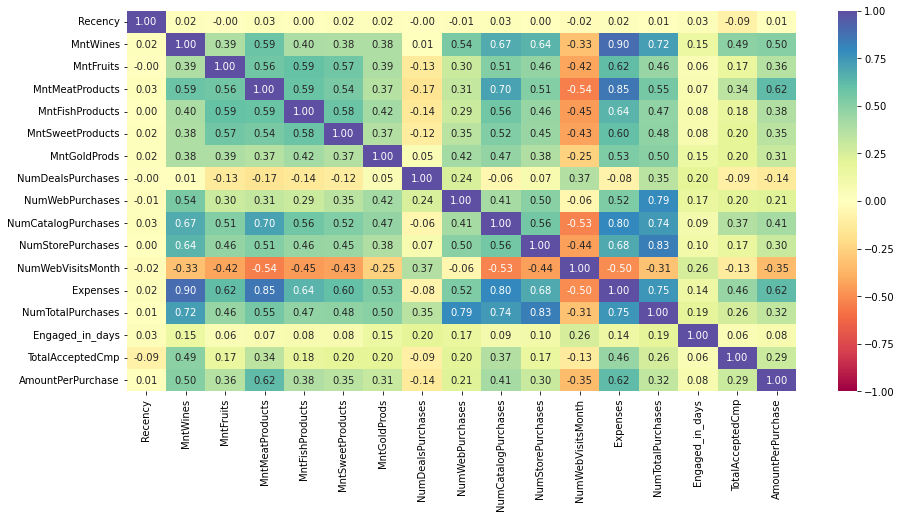

In [63]:
plt.figure(figsize=(15, 7))                                                        # Setting the plot size
sns.heatmap(data_model.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")  # Plotting the correlation plot
plt.show()

**Observations and Insights:**
- There is a lot of negative correlation between web visits a month and the amount of products bought which is concerning/confusing 
- There is a strong positive correlation between catalog purchases and wine/meat sold 
- Very strong positive correlation (stronger than other products) regarding wine and meat products and expenses. This means wine and meat make up a large amount of how much customers are spending, important products. 
- Web purchases has a weaker positive correlation to products sold than catalog or store purchases
- The total offers customers accepted was most positively correlated with meat and wines

### **Scaling the Data**


In [64]:
# Applying standard scaler on new data
scaler = StandardScaler()                                                   # Initialize the Standard Scaler

df_scaled = scaler.fit_transform(data_model)                                     # fit_transform the scaler function on new data

df_scaled = pd.DataFrame(df_scaled, columns=data_model.columns)      # Converting the embeddings to a dataframe

df_scaled.head()

,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Expenses,NumTotalPurchases,Engaged_in_days,TotalAcceptedCmp,AmountPerPurchase
0,0.306906,0.979274,1.549793,1.735137,2.455586,1.471064,0.841828,0.357919,1.404892,2.633008,-0.561330,0.696875,1.682349,1.329371,1.975678,0.619416,0.697428
1,-0.384035,-0.873925,-0.638021,-0.726901,-0.652191,-0.633425,-0.732464,-0.169952,-1.119121,-0.586255,-1.178960,-0.135935,-0.963691,-1.167064,-1.667464,-0.503906,-0.638991
2,-0.798600,0.358572,0.569049,-0.175222,1.340442,-0.149634,-0.041311,-0.697824,1.404892,-0.228559,1.291559,-0.552339,0.282777,0.803806,-0.173173,-0.503906,0.081680
3,-0.798600,-0.873925,-0.562579,-0.663070,-0.505942,-0.585045,-0.751662,-0.169952,-0.758548,-0.943951,-0.561330,0.280470,-0.920422,-0.904281,-1.925843,-0.503906,-0.591801
4,1.550599,-0.392806,0.418165,-0.216256,0.152175,-0.004497,-0.559676,1.413662,0.323172,0.129137,0.056299,-0.135935,-0.306341,0.541023,-0.823427,-0.503906,-0.245693


### **Applying T-SNE**


<AxesSubplot:xlabel='0', ylabel='1'>

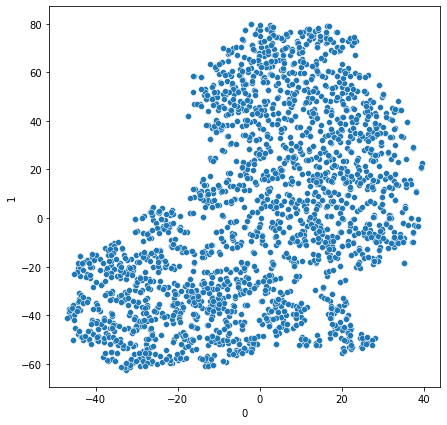

In [65]:
# Fitting T-SNE with number of components equal to 2 to visualize how data is distributed

tsne = TSNE(n_components = 2, random_state = 1, perplexity = 35)       
data_tsne = tsne.fit_transform(df_scaled)                            # fit_transform T-SNE on new data

data_tsne = pd.DataFrame(data_tsne, columns=[0, 1])           # Converting the embeddings to a dataframe

plt.figure(figsize=(7, 7))                                                    # Scatter plot for two components

sns.scatterplot(x=0, y=1, data=data_tsne)

**Observation and Insights:**
- There are not any clear groups that are well separated, the groups are all fairly close to each other. 
- The strong correlations within the variables have probably led to this poor clustering 

### **Applying PCA**


In [66]:
# Defining the number of principal components to generate
n = data_model.shape[1]                                        # Storing the number of variables in the data

pca = PCA(n_components=n, random_state=1)                                        

data_pca = pd.DataFrame(pca.fit_transform(df_scaled))                      # fit_transform PCA on the scaled data

# The percentage of variance explained by each principal component is stored
exp_var = pca.explained_variance_ratio_                     

<AxesSubplot:xlabel='0', ylabel='1'>

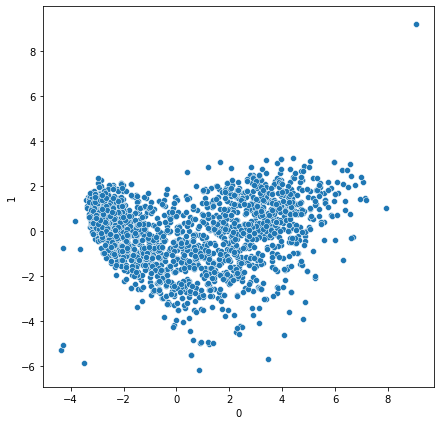

In [67]:
plt.figure(figsize=(7, 7))                                                    # Scatter plot for two components

sns.scatterplot(x=0, y=1, data=data_pca)

### **K-Means**


In [68]:
distortions = []                                                  # Create an empty list

K = range(2, 10)                                                  # Setting the K range from 2 to 10

for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=4)              # Initialize K-Means
    kmeanModel.fit(data_pca)                                      # Fit K-Means on the data
    distortions.append(kmeanModel.inertia_)                       # Append distortion values to the empty list created above

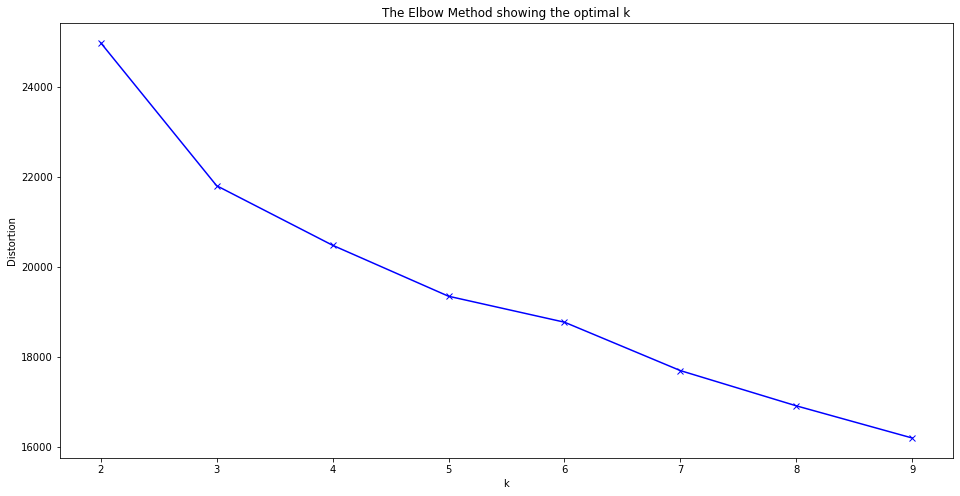

In [69]:
# Plotting the elbow plot
plt.figure(figsize=(16, 8))                                            # Setting the plot size

plt.plot(K, distortions, "bx-")                                        # Plotting the K on X-axis and distortions on y-axis

plt.xlabel("k")                                                        # Title of x-axis

plt.ylabel("Distortion")                                               # Title of y-axis

plt.title("The Elbow Method showing the optimal k")                    # Title of the plot
plt.show()

**Observation and Insights:**

- The elbow plot shows that the optimal k value is 3 as the values after 3 decrease in a fairly linear fashion. 

### **Silhouette Score**


In [70]:
sil_score = []                                                             # Creating empty list
cluster_list = range(3, 7)                                                 # Creating a range from 3 to 7
for n_clusters in cluster_list:
    
    # Initialize K-Means with number of clusters equal to n_clusters and random_state=1
    clusterer = KMeans(n_clusters = n_clusters, random_state = 1).fit(data_pca)
    
    # Fit and predict on the pca data
    preds = clusterer.predict(data_pca)
 
    
    # Calculate silhouette score - 
    score = silhouette_score(data_pca, preds)
    
    # Append silhouette score to empty list created above
    sil_score.append(score)
    
    # Print the silhouette score
    print( "For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))  

For n_clusters = 3, the silhouette score is 0.27163034118812057)
For n_clusters = 4, the silhouette score is 0.25217341541207783)
For n_clusters = 5, the silhouette score is 0.22067844218107244)
For n_clusters = 6, the silhouette score is 0.1272310353107261)


**From the above silhouette scores, n=3 appears to have the best value for K.**

In [71]:
kmeans = KMeans(n_clusters = 3, random_state = 1).fit(data_pca)                               # Initialize the K-Means algorithm with 3 clusters and random_state=1


In [72]:
data_pca["K_means_segments_3"] = kmeans.labels_                    # Adding K-Means cluster labels to the data_pca data

data["K_means_segments_3"] = kmeans.labels_                        # Adding K-Means cluster labels to the whole data

data_model["K_means_segments_3"] = kmeans.labels_ 

In [73]:
# Function to visualize PCA data with clusters formed
def PCA_PLOT(X, Y, PCA, cluster):
    sns.scatterplot(x=X, y=1, data=PCA, hue=cluster)

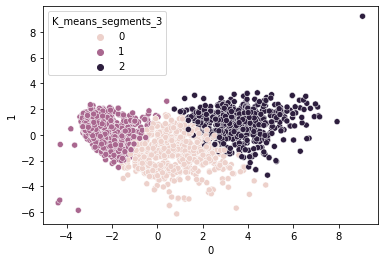

In [74]:
PCA_PLOT(0, 1, data_pca, "K_means_segments_3")

**Observations and Insights:**
- There are 3 observable clusters that are fairly easily distinguishable. There is not a large amount of seperation but the values in the clusters are clearly identifiable. 

### **Cluster Profiling**

In [75]:
# Taking the cluster-wise mean of all the variables. 
cluster_profile_KMeans_3 = data.groupby('K_means_segments_3').mean()

In [76]:
cluster_profile_KMeans_3.style.highlight_max(color="lightgreen", axis=0)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Kids,Status,Family_Size,Expenses,NumTotalPurchases,Engaged_in_days,TotalAcceptedCmp,AmountPerPurchase
K_means_segments_3,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1965.925865,57680.085667,0.281713,0.843493,47.673806,454.586491,23.186161,138.413509,30.570016,24.663921,62.253707,3.782537,6.492586,3.107084,7.883031,5.752883,0.070840,0.125206,0.023064,0.036244,0.014827,0.008237,0.133443,50.074135,1.125206,1.657331,2.782537,733.673806,21.265239,593.739703,0.403624,34.359878
1,1970.975425,35331.837429,0.755198,0.475425,49.260870,45.191871,5.068998,23.705104,7.374291,5.169187,15.291115,2.026465,2.142722,0.572779,3.294896,6.376181,0.068053,0.015123,0.000000,0.000945,0.001890,0.010397,0.084121,45.024575,1.230624,1.652174,2.882798,101.800567,8.036862,500.201323,0.170132,11.321001
2,1968.160142,75902.170819,0.035587,0.206406,50.402135,633.585409,69.914591,461.421708,102.395018,71.357651,78.932384,1.300712,5.215302,6.023132,8.336299,2.889680,0.085409,0.133452,0.263345,0.215302,0.032028,0.007117,0.291815,47.839858,0.241993,1.617438,1.859431,1417.606762,20.875445,549.802491,1.021352,73.430131


**Observations and Insights:**
- There seems to be 3 clear income levels within the clusters. That will be a good identifying factor for the clusters which can then be used to analyze the other variables. The amount of products, whether that be a high or low amount, can be established. However, there is some room for improvement.

In [77]:
# Columns to use in boxplot
col_for_box = ['Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Complain','Age','Family_Size','Expenses','NumTotalPurchases','Engaged_in_days','TotalAcceptedCmp','AmountPerPurchase']

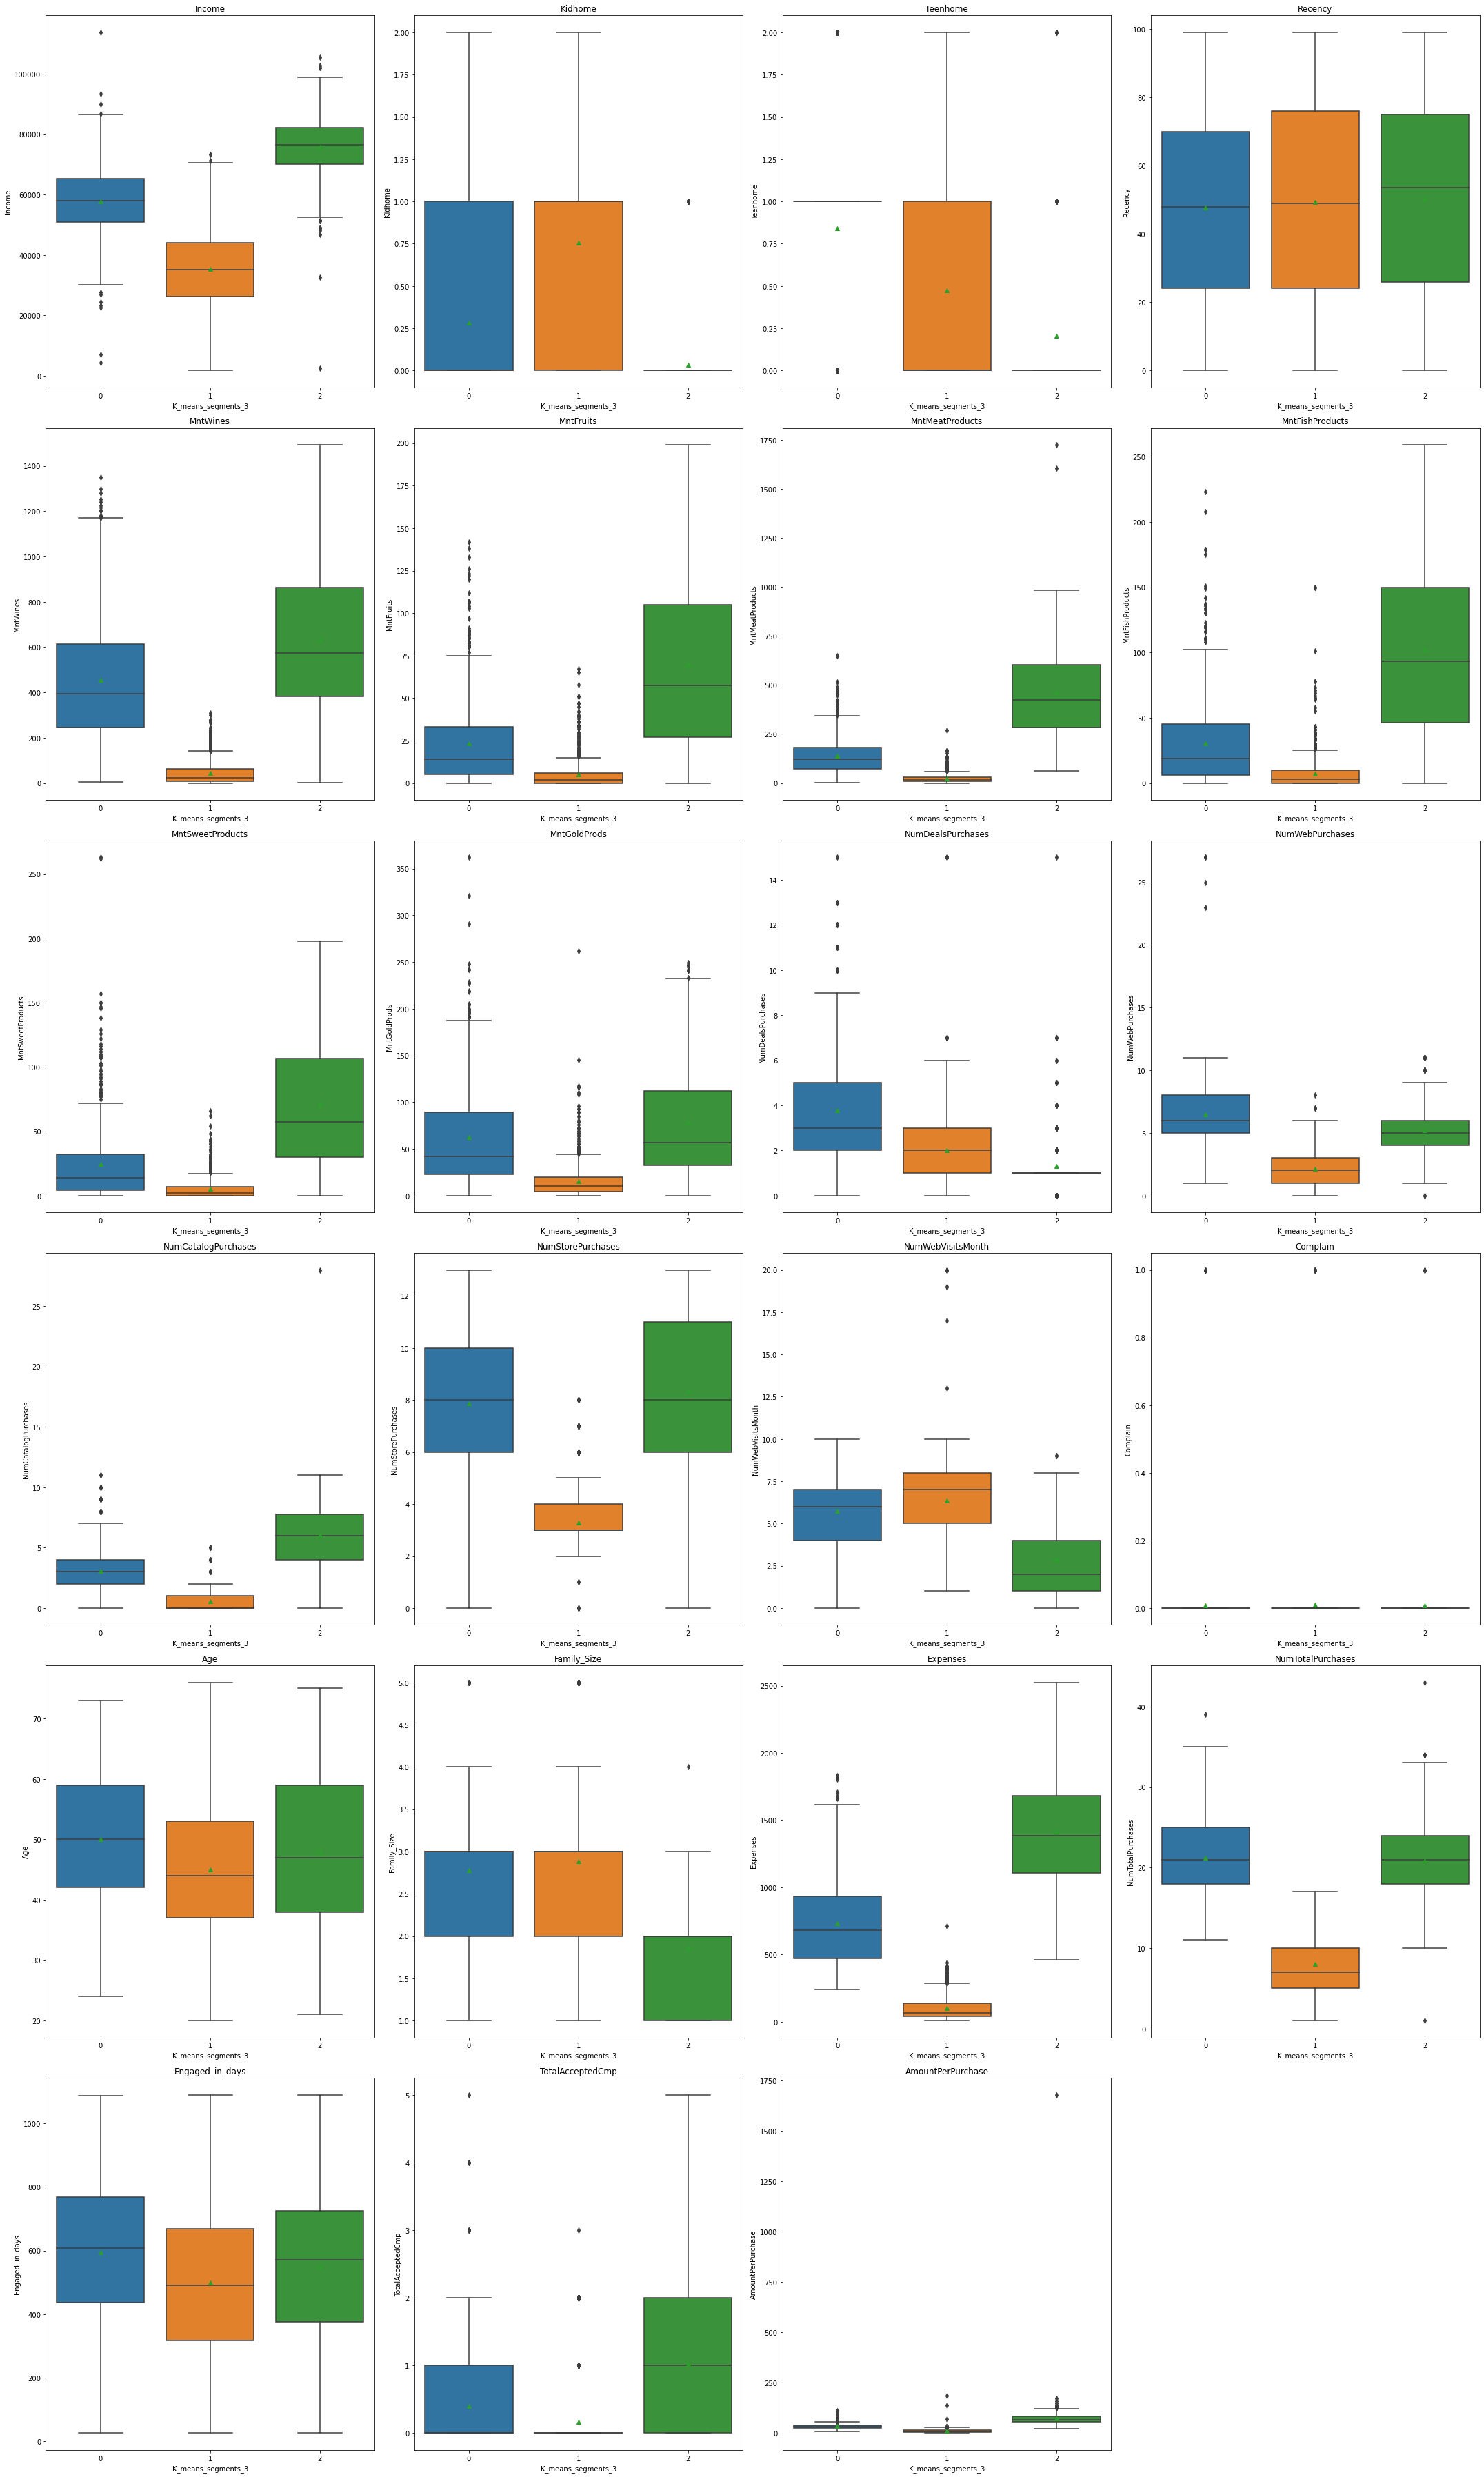

In [78]:
# Creating boxplot for each of the variables
all_col = col_for_box

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)
    
    sns.boxplot(y=data[variable], x=data['K_means_segments_3'],showmeans=True)
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

### **Characteristics of each cluster:**



**Cluster 0:Low level Income**

**Summary for cluster 1:This group was the lowest income and also the youngest of the groups. They bought all products significantly less than the other two groups. This could be due to the presence of young kids and having those responsibilities with low income. They had the most web visits but did not go to the store or buy online much. This could be an area to explore with possible deals to attract them to come to the stores. This group had the lowest campaigns accepted so it is a large area for improvement. **


**Cluster 1:High Income** 

**Summary for cluster 2: This group had the highest income and were in the middle age between the groups. This group could be categorized as single or married couples without kids due to the kid/teen rate at home being very low and the average total family size being under 2. They bought a lot of meat, wine, gold. They also led the total expenses spent on products by a very wide margin. This is a very important part of the customer base due to their high spending. This group preferred to go to the store or buy off catalog. An area to improve can be internet interaction.  **

**Cluster 2: Mid-Level Income Group**

**Summary for cluster 0: This group came in the middle of income and is the oldest of the three clusters. This makes sense also with the fact that they have the most teenagers at home. This group surprisingly led in total purchases due to their internet purchasing/deals used. However, this group accepted campaigns at a very low rate compared to how many purchases were made. Campaigns could target this middle class group more. They spent on wine/gold at a higher rate than expected when looking at all the clusters. ** 

In [79]:
data_pca.drop(kmeans.labels_)
data.drop(columns = ['K_means_segments_3'], inplace = True , axis = 1 )

In [80]:
kmeans = KMeans(n_clusters = 5, random_state = 1).fit(data_pca)             


In [81]:
data_pca["K_means_segments_5"] = kmeans.labels_                    # Adding K-Means cluster labels to the data_pca data

data["K_means_segments_5"] = kmeans.labels_                        # Adding K-Means cluster labels to the whole data

data_model["K_means_segments_5"] = kmeans.labels_ 

In [82]:
# Function to visualize PCA data with clusters formed
def PCA_PLOT(X, Y, PCA, cluster):
    sns.scatterplot(x=X, y=1, data=PCA, hue=cluster)

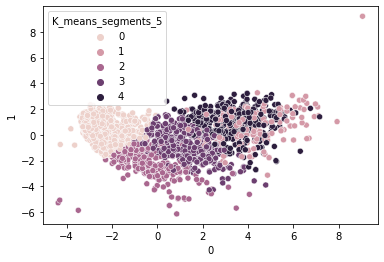

In [83]:
PCA_PLOT(0, 1, data_pca, "K_means_segments_5")

In [84]:
cluster_profile_KMeans_5 = data.groupby('K_means_segments_5').mean()

In [85]:
cluster_profile_KMeans_5.style.highlight_max(color="lightgreen", axis=0)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Kids,Status,Family_Size,Expenses,NumTotalPurchases,Engaged_in_days,TotalAcceptedCmp,AmountPerPurchase
K_means_segments_5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1971.199601,35009.561876,0.750499,0.463074,49.231537,39.990020,4.908184,21.394212,7.062874,5.083832,14.677645,1.858283,2.028942,0.532934,3.239521,6.299401,0.062874,0.013972,0.000000,0.000998,0.001996,0.010978,0.078842,44.800399,1.213573,1.653693,2.867265,93.116766,7.659681,492.619760,0.158683,10.961824
1,1969.263736,80181.500000,0.043956,0.153846,47.818681,912.241758,54.747253,492.307692,81.104396,62.192308,74.208791,1.120879,5.725275,6.241758,7.972527,3.456044,0.230769,0.390110,0.681319,0.500000,0.115385,0.005495,0.692308,46.736264,0.197802,1.598901,1.796703,1676.802198,21.060440,584.197802,2.609890,91.735714
2,1967.223881,48323.197761,0.652985,0.847015,49.074627,297.940299,10.955224,91.895522,17.970149,13.014925,51.574627,5.731343,6.037313,2.011194,5.850746,7.264925,0.093284,0.111940,0.003731,0.029851,0.007463,0.007463,0.205224,48.776119,1.500000,1.660448,3.160448,483.350746,19.630597,654.511194,0.451493,23.798130
3,1965.146907,61485.097938,0.108247,0.824742,46.974227,509.760309,29.572165,159.252577,36.840206,30.471649,64.621134,2.649485,6.476804,3.574742,8.752577,5.015464,0.064433,0.113402,0.020619,0.028351,0.010309,0.007732,0.079897,50.853093,0.932990,1.649485,2.582474,830.518041,21.453608,558.417526,0.317010,38.861237
4,1967.633075,73825.496124,0.033592,0.237726,51.604651,506.689922,76.064599,441.759690,110.997416,74.467700,80.666667,1.397933,4.994832,5.894057,8.514212,2.656331,0.020672,0.020672,0.074935,0.085271,0.000000,0.007752,0.111111,48.366925,0.271318,1.627907,1.899225,1290.645995,20.801034,533.844961,0.312661,64.511868


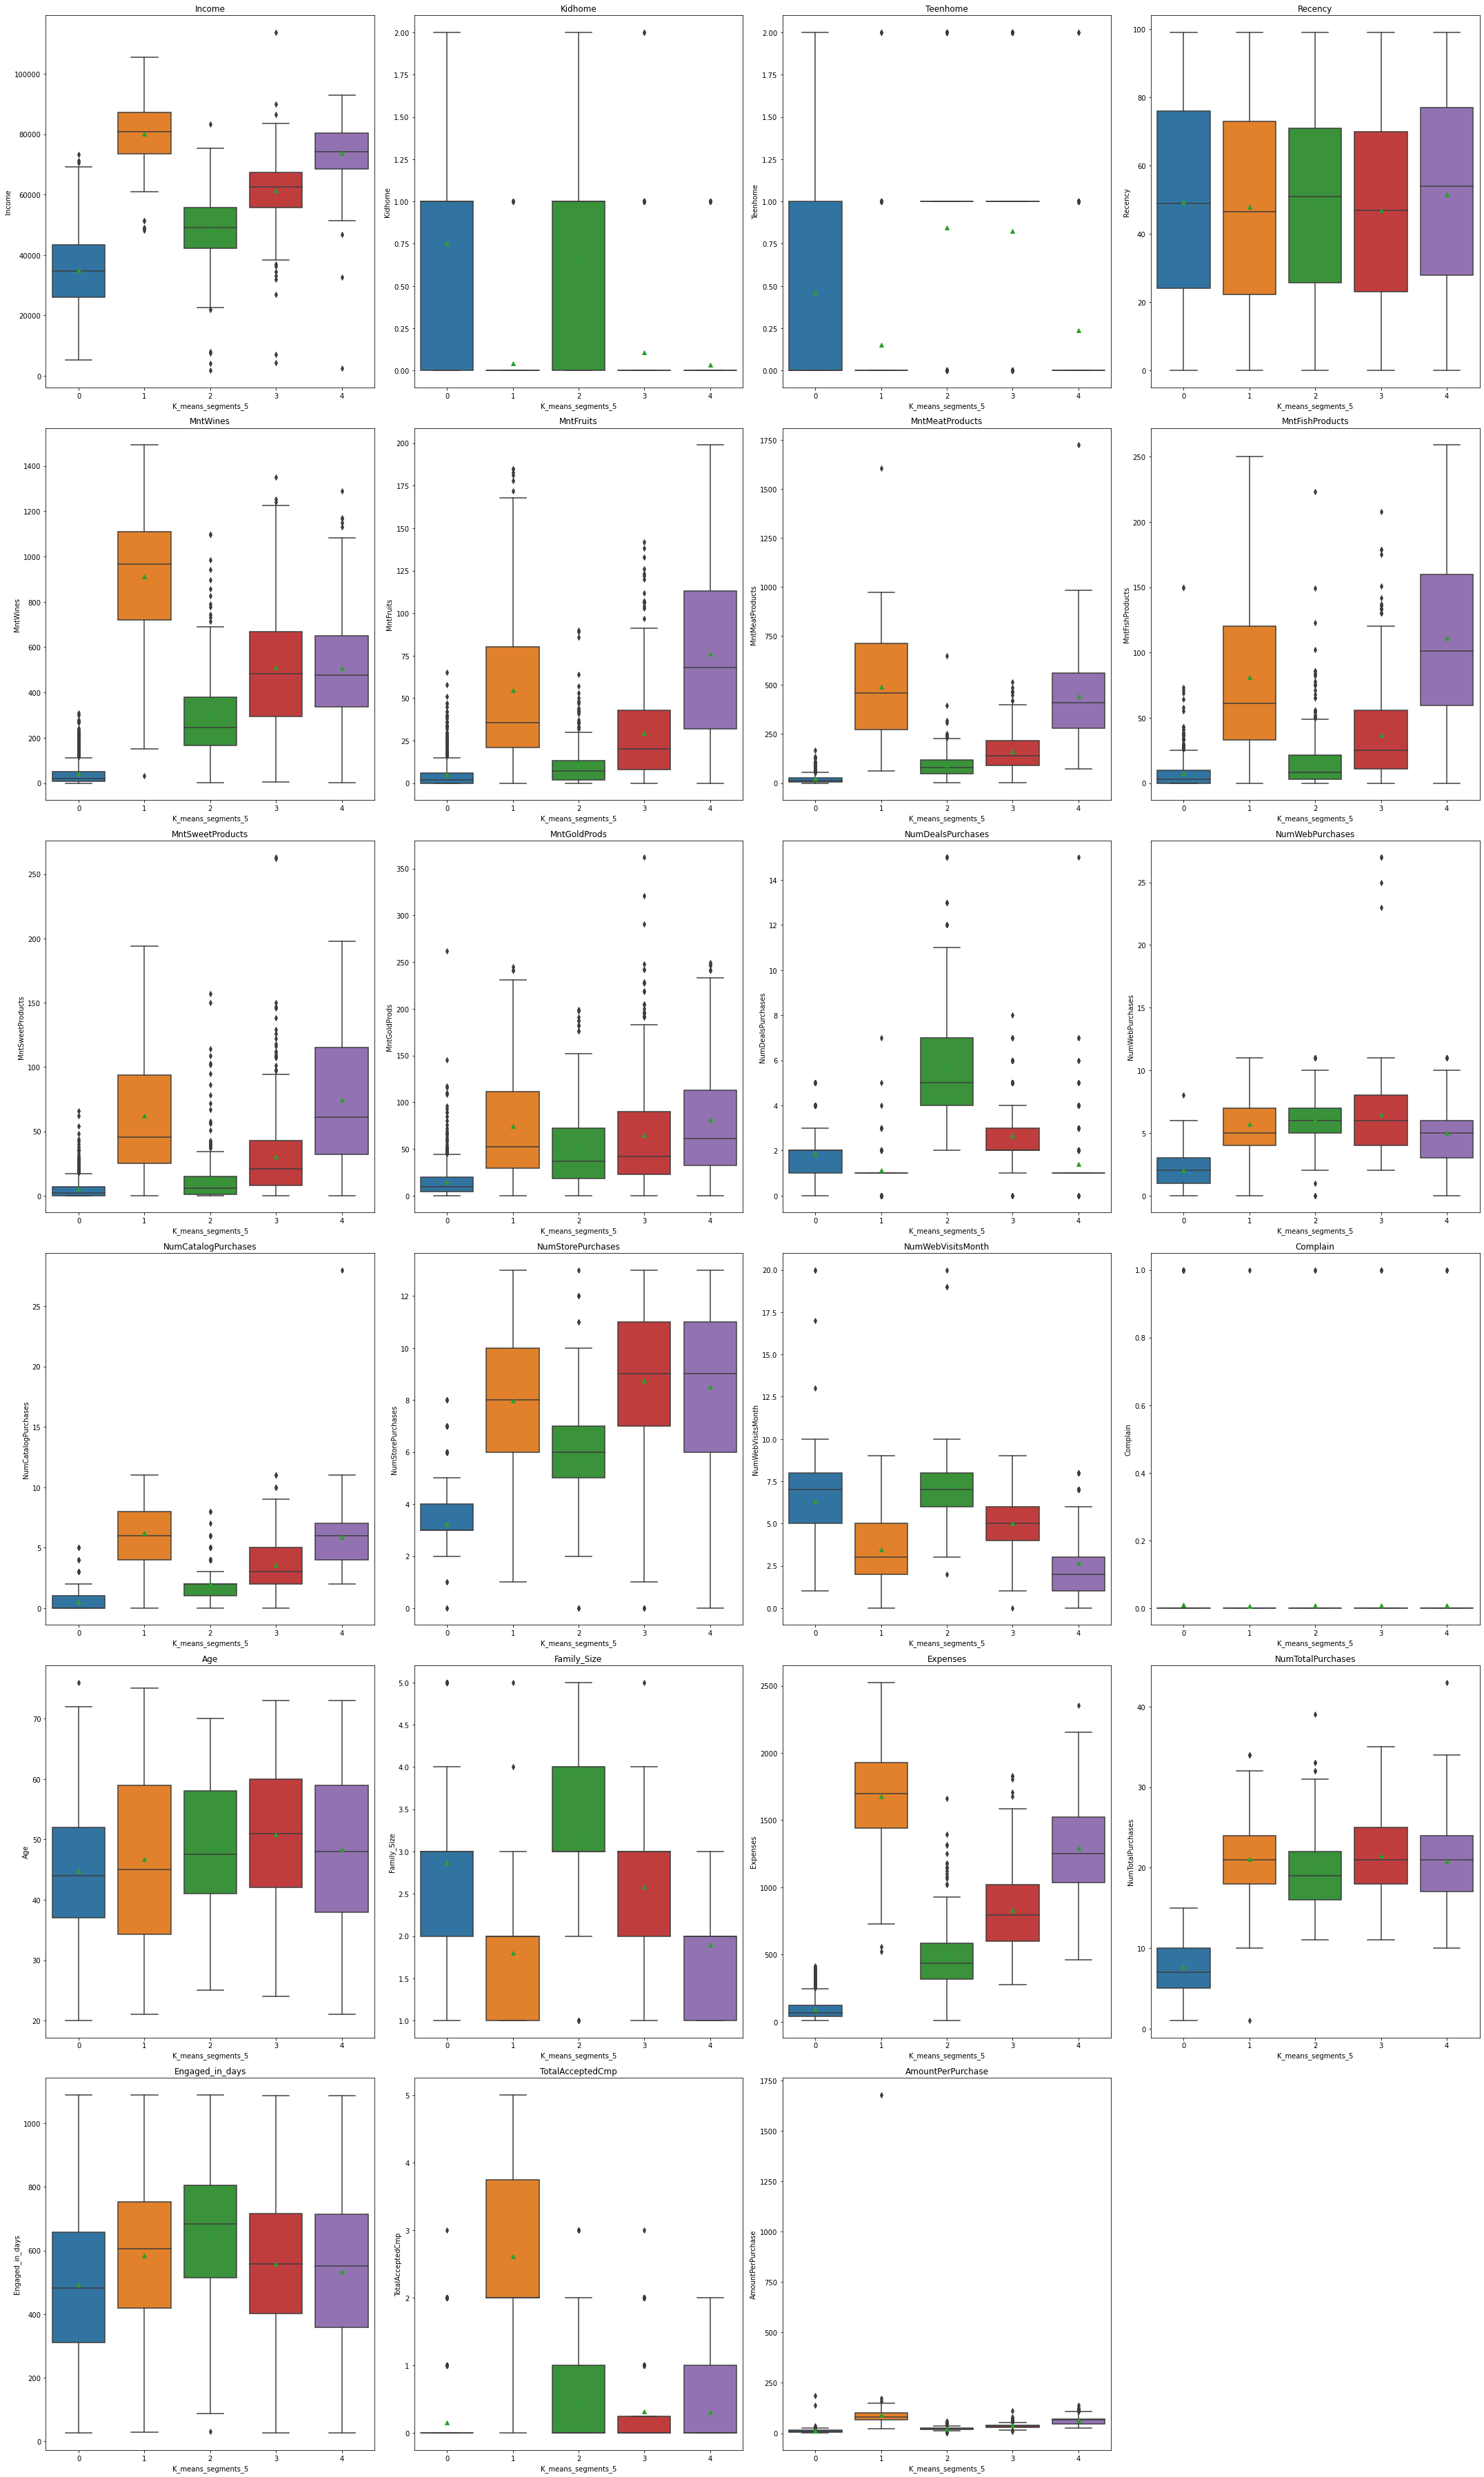

In [86]:
# Creating boxplot for each of the variables
all_col = col_for_box

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)
    
    sns.boxplot(y=data[variable], x=data['K_means_segments_5'],showmeans=True)
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

### **Characteristics of each cluster:**

**Cluster 0:Lowest Level Income**

**Summary for cluster 0: Youngest group, most kids at home, 2nd highest family size, by far the lowest spent on products. This group is the least spending group by far and the campaigns are least effective with this group. Need to examine and see if the income is the only problem or if there are ways to encourage them to spend more

**Cluster 1: Highest Income**

**Summary for cluster 1: This is the highest earning group as well as the highest spending group. Majority of the spending is on wine and meat, there is lot of potential for even more spending on the other products available. Need more web interaction. They have by far the most accepted campaign offers, shows they are effective on this group


**Cluster 2:Lower middle income group** 

**Summary for cluster 2: This group is higher than cluster 0 in income but are 2nd least. They are even more family identified. Largest family size as well as most kids. This group is older and tends to have more teens than kids as well. They use deals the most out of any group and shop online a lot. Interesting to see the expenses and number of purchases is much higher than cluster 0 despite only having an income 13k higher.

**Cluster 3: Middle Income** 

**Summary for cluster 3: The oldest group as well as the average income out of all the clusters. They have the highest number of total purchases but the amount per purchase is lagging behind the other two higher income groups. An area to improve is catalog purchases, could increase the amount per purchase. Heavy store and internet purchasers.

**Cluster 4: Upper Middle Income Group** 

**Summary for cluster 4: Higher end age group with very little kids, family size average under 2 which can indicate single partners or couples without kids. Second highest spent on products but have the most diverse spending on items. Lead fruits, fish, sweet, and gold products bought. This could be an important cluster to look at and see why those products are doing well this group. Web interaction could be higher.

In [87]:
data_pca.drop(kmeans.labels_)
data.drop(columns = ['K_means_segments_5'], inplace = True , axis = 1 )

## **K-Medoids**

- Silhouette score for K=5 in K-Medoids

In [88]:
sil_score = []                                                             

    # Initialize K-Medoids with number of clusters equal to 5 and random_state=1
kmedo = KMedoids(n_clusters = 5, random_state = 1).fit(data_pca)
    
    # Fit and predict on the pca data
preds = kmedo.predict(data_pca)
    
    # Calculate silhouette score - 
score = silhouette_score(data_pca, preds)
    
    # Append silhouette score to empty list created above
sil_score.append(score)
    
    # Print the silhouette score
print(score) 

0.13192861146254325


In [89]:
data_pca["K_medoids_5"] = kmedo.labels_                    

data["K_medoids_5"] = kmedo.labels_                        

data_model["K_medoids_5"] = kmedo.labels_ 

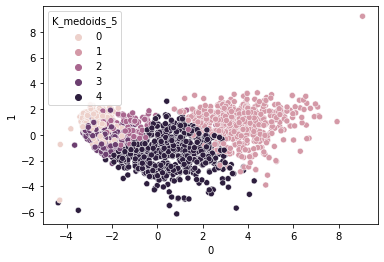

In [90]:
def PCA_PLOT(X, Y, PCA, cluster):
    sns.scatterplot(x=X, y=1, data=PCA, hue=cluster)
PCA_PLOT(0, 1, data_pca, "K_medoids_5")

In [91]:
cluster_profile_KMedoids_5 = data.groupby('K_medoids_5').mean()

In [92]:
cluster_profile_KMedoids_5.style.highlight_max(color="lightgreen", axis=0)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Kids,Status,Family_Size,Expenses,NumTotalPurchases,Engaged_in_days,TotalAcceptedCmp,AmountPerPurchase
K_medoids_5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1971.216061,33792.105163,0.837476,0.470363,45.095602,25.210325,3.080306,14.546845,4.271511,3.200765,10.464627,1.774379,1.745698,0.330784,2.921606,6.346080,0.084130,0.011472,0.000000,0.000000,0.003824,0.007648,0.076482,44.783939,1.307839,1.640535,2.948375,60.774379,6.772467,363.237094,0.175908,8.774223
1,1968.271429,75616.221429,0.035714,0.212500,50.725000,625.535714,70.716071,463.423214,103.339286,72.803571,79.257143,1.344643,5.273214,6.033929,8.430357,2.917857,0.083929,0.117857,0.250000,0.214286,0.025000,0.007143,0.283929,47.728571,0.248214,1.623214,1.871429,1415.075000,21.082143,553.262500,0.975000,72.658827
2,1969.298013,47415.139073,0.417219,0.536424,34.258278,138.768212,11.178808,55.066225,17.086093,11.337748,26.649007,2.079470,3.357616,1.384106,4.774834,5.006623,0.013245,0.079470,0.019868,0.019868,0.013245,0.013245,0.052980,46.701987,0.953642,1.655629,2.609272,260.086093,11.596026,442.695364,0.198675,21.422494
3,1971.964179,31786.110448,0.758209,0.417910,62.226866,30.749254,5.125373,20.528358,7.337313,5.361194,16.176119,1.931343,1.901493,0.516418,3.056716,6.811940,0.053731,0.002985,0.000000,0.000000,0.000000,0.014925,0.098507,44.035821,1.176119,1.674627,2.850746,85.277612,7.405970,718.689552,0.155224,10.808459
4,1965.904255,56570.711246,0.326748,0.828267,47.677812,433.255319,21.446809,130.849544,28.513678,22.174772,59.310030,3.843465,6.275076,2.952888,7.541033,5.882979,0.079027,0.124620,0.028875,0.031915,0.016717,0.007599,0.142857,50.095745,1.155015,1.648936,2.803951,695.550152,20.612462,594.519757,0.424012,33.386485


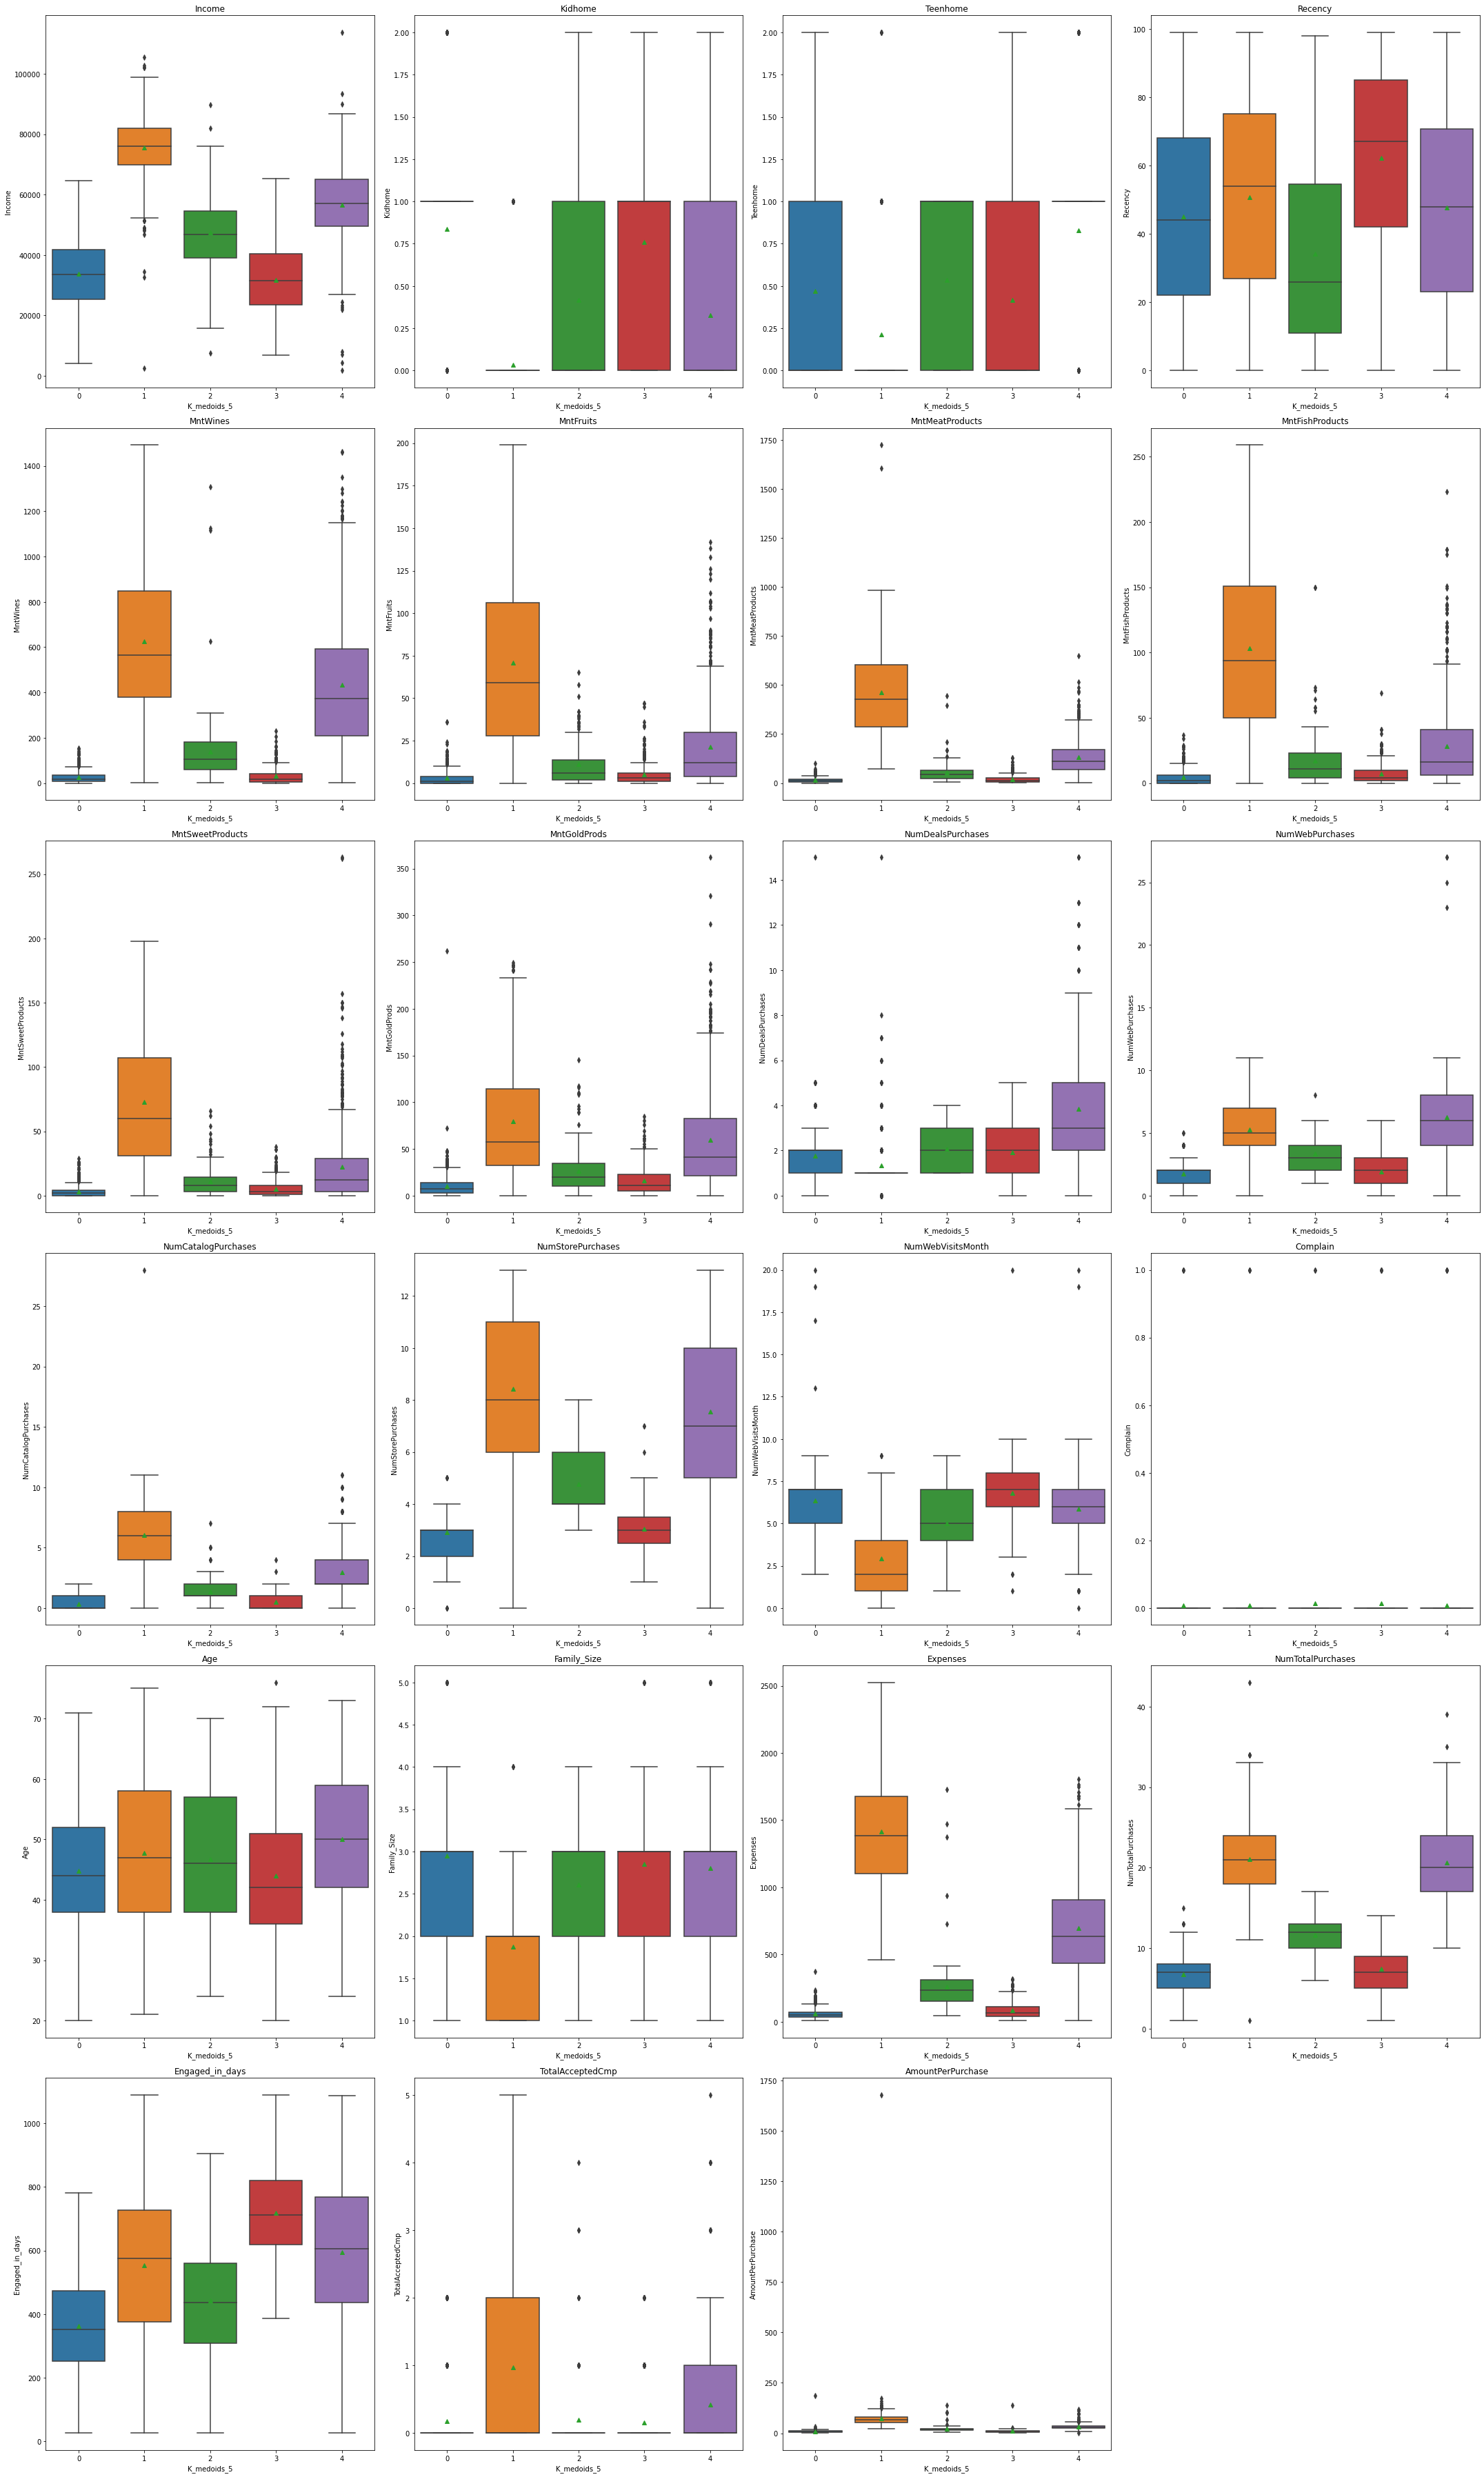

In [93]:
# Creating boxplot for each of the variables
all_col = col_for_box

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)
    
    sns.boxplot(y=data[variable], x=data['K_medoids_5'],showmeans=True)
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

### **Characteristics of each cluster:**

**Cluster 0: Highest Income**

**Summary for cluster 0:Same as previous high income clusters. High income, most spent on products, low amount of kids/family size, catalog and store purchases high, surprisingly not highest wine purchasers. Could have improvement in web visits within this group

**Cluster 1: First Low Income Group**

**Summary for cluster 1: Normal low income traits previously dicsussed. This is the youngest cluster, lowest spending, highest kids. Fairly high web visits, very low catalog purchases. 


**Cluster 2: Upper-middle Income** 

**Summary for cluster 2: Oldest group, higher teens in the house. Their accepted campaign offers is actually very high which indicates they respond well to them. This tends to be the more mature group of upper income, usually with older kids. They have a high number of amount of purchases, the potential here is more in the amount per purchase. **

**Cluster 3:Second Low Income group** 

**Summary for cluster 3: There is not a big difference between this cluster and cluster 1 however they have spent nearly 2.25x more than cluster 1. This is interesting to look at, there could be characteristics within this group that can be expanded to cluster 1. They have more purchases across the board and in terms of where they are going to buy. These are also the longest engaging customers out of all the clusters by a good margin

**Cluster 4:Lower Middle Income** 

**Summary for cluster 4: Fairly normal through out most of the categories. However, it has been the longest time on average for this cluster to buy a product. They also accept campaigns at the lowest rate which is a problem. This group could be a lot more successful for the company if the campaigns were drawing them in more. High potential

In [94]:
data_pca.drop(kmedo.labels_)
data.drop(columns = ['K_medoids_5'], inplace = True , axis = 1 )

## **Hierarchical Clustering**

In [95]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average"]

high_cophenet_corr = 0                                                 # Creating a variable by assigning 0 to it
high_dm_lm = [0, 0]                                                    # Creating a list by assigning 0's to it

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(data_pca, metric=dm, method=lm)                    # Applying different linkages with different distance on data_pca
        c, coph_dists = cophenet(Z, pdist(data_pca))                   # Calculating cophenetic correlation
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:                                     # Checking if cophenetic correlation is higher than previous score
            high_cophenet_corr = c                                     # Appending to high_cophenet_corr list if it is higher
            high_dm_lm[0] = dm                                         # Appending its corresponding distance
            high_dm_lm[1] = lm                                         # Appending its corresponding method or linkage

Cophenetic correlation for Euclidean distance and single linkage is 0.7977598036716198.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7204882408579776.
Cophenetic correlation for Euclidean distance and average linkage is 0.8899992234078089.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7213841935642492.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.7311700373087049.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8693248713666206.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.5934386695057214.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6109259914895999.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.6529060834456106.
Cophenetic correlation for Cityblock distance and single linkage is 0.7908796302909723.
Cophenetic correlation for Cityblock distance and complete linkage is 0.7714458959316278.
Cophenetic corr

In [96]:
# Printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8899992234078089, which is obtained with Euclidean distance and average linkage.


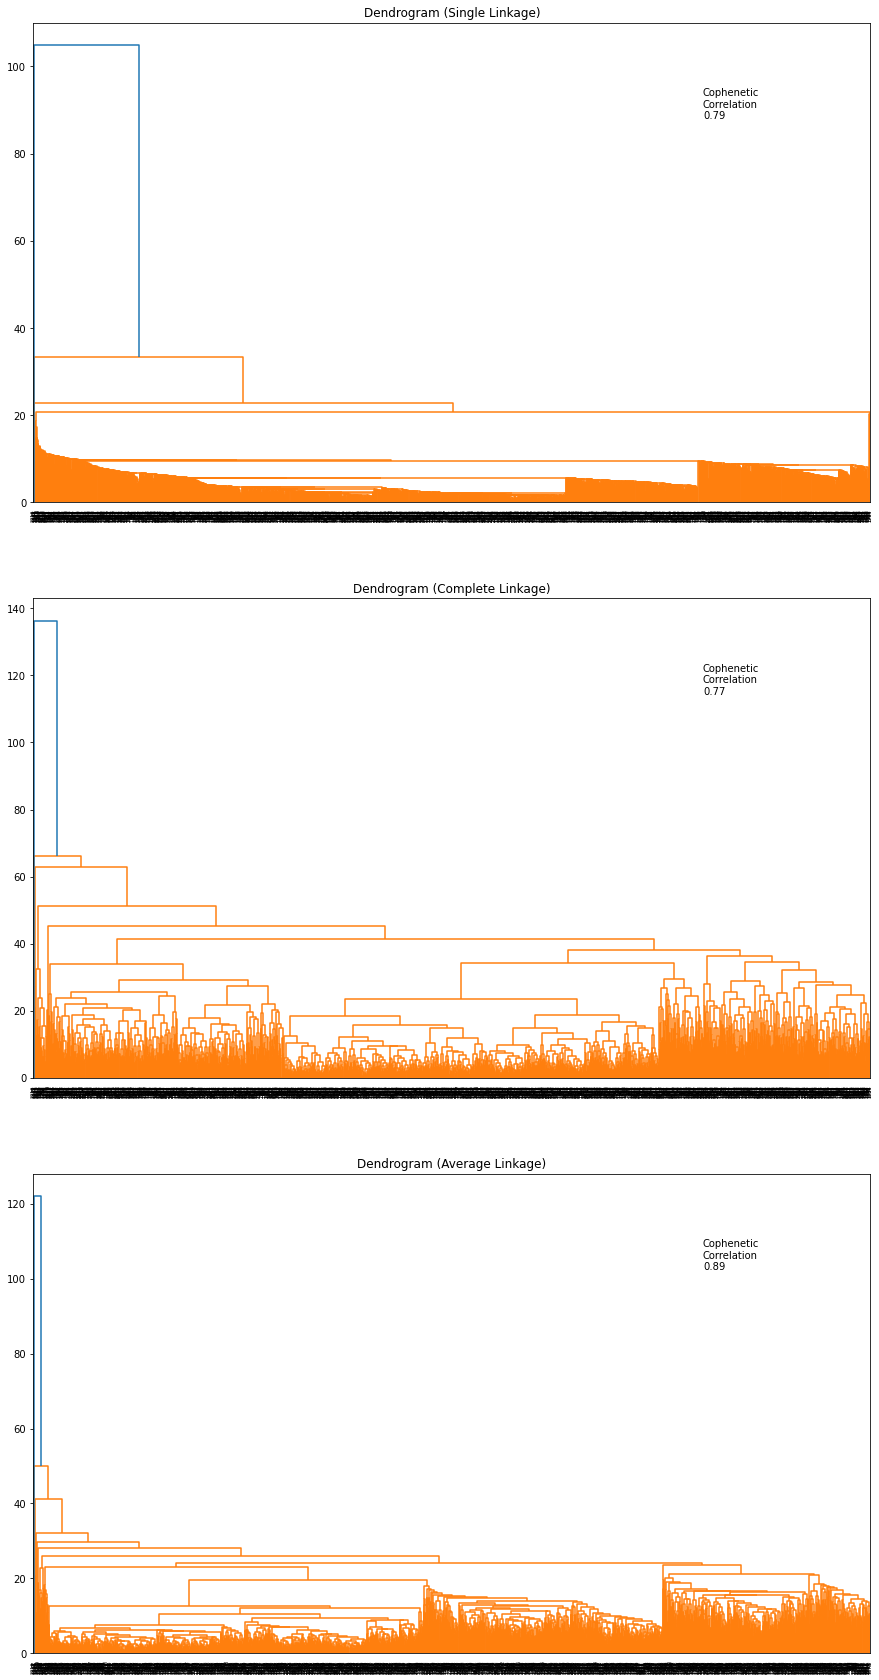

In [97]:
# List of linkage methods
linkage_methods = ["single", "complete", "average"]

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# To create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))            # Setting the plot size

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(data_pca, metric="Cityblock", method=method)                  # Measures the distances between two clusters

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")           # Title of dendrogram

    coph_corr, coph_dist = cophenet(Z, pdist(data_pca))                       # Finding cophenetic correlation for different linkages with city block distance
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

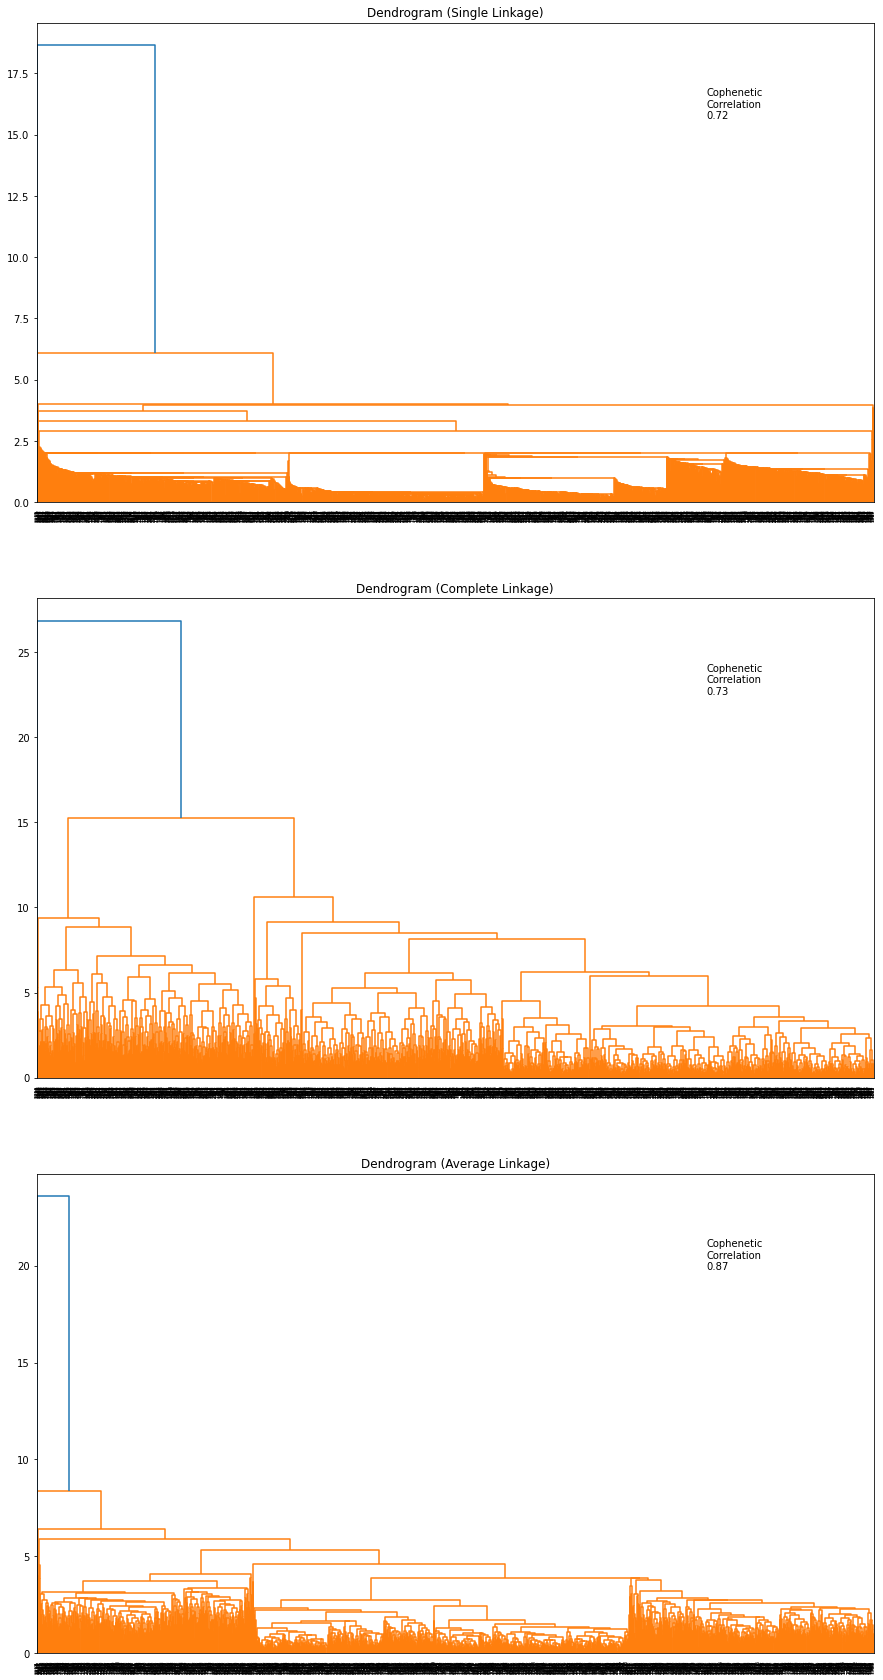

In [98]:
# Plot the dendrogram for Chebyshev distance with linkages single, complete and average.  
# List of linkage methods
linkage_methods = ["single", "complete", "average"]

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# To create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))            # Setting the plot size

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(data_pca, metric="Chebyshev", method=method)                  # Measures the distances between two clusters

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")           # Title of dendrogram

    coph_corr, coph_dist = cophenet(Z, pdist(data_pca))                       # Finding cophenetic correlation for different linkages with city block distance
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

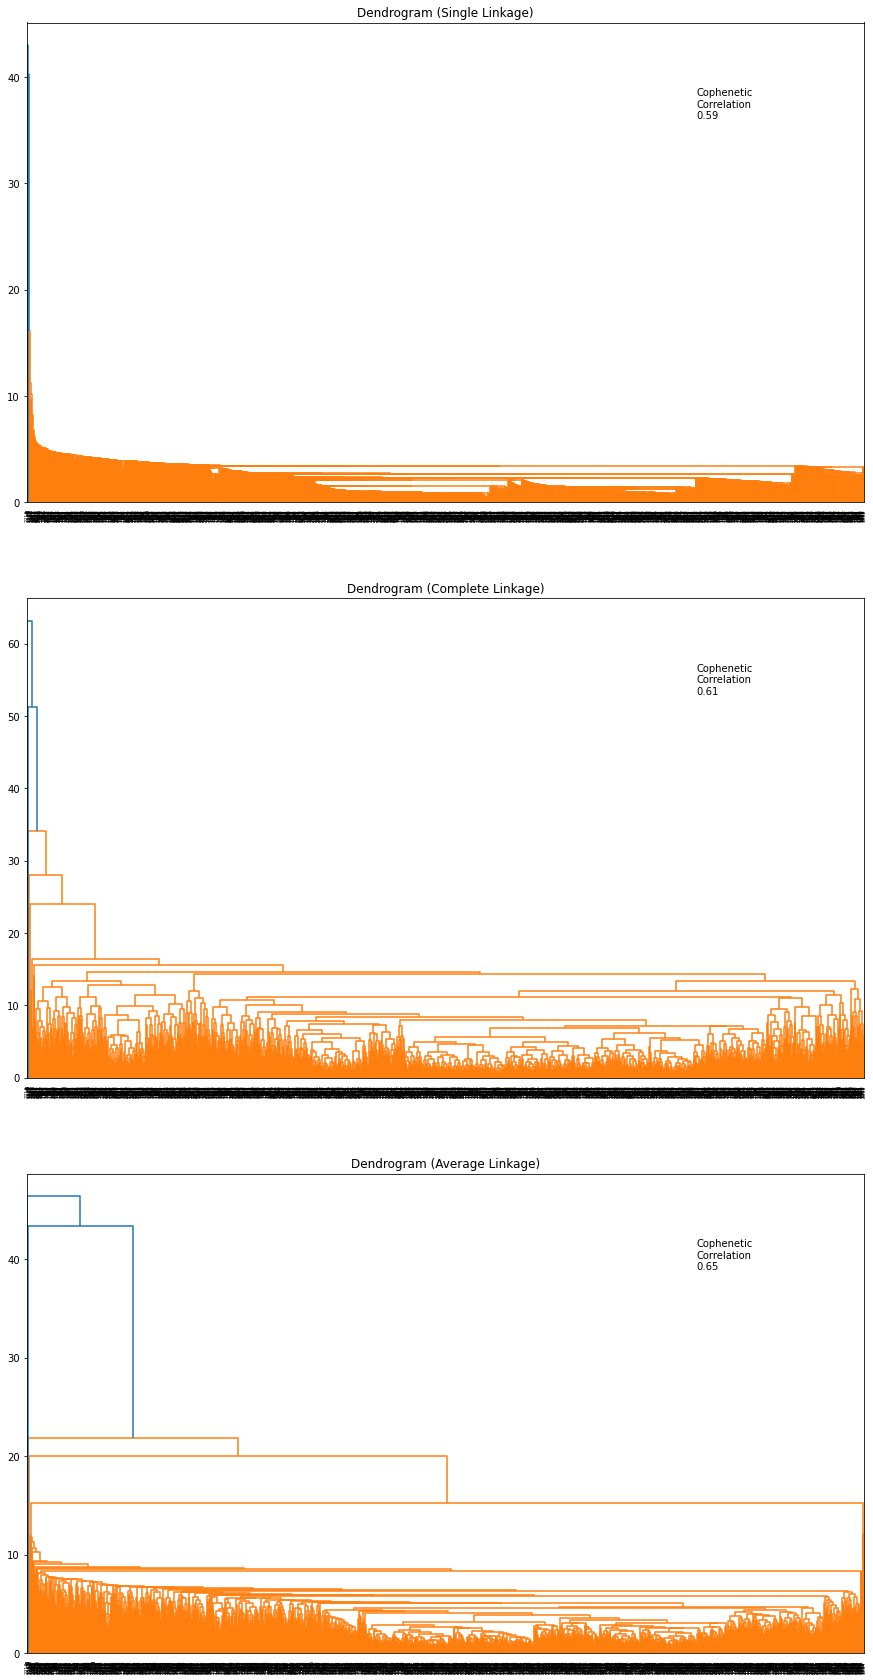

In [99]:
# Plot the dendrogram for Mahalanobis distance with linkages single, complete and average. 
# List of linkage methods
linkage_methods = ["single", "complete", "average"]

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# To create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))            # Setting the plot size

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(data_pca, metric="mahalanobis", method=method)                  # Measures the distances between two clusters

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")           # Title of dendrogram

    coph_corr, coph_dist = cophenet(Z, pdist(data_pca))                       # Finding cophenetic correlation for different linkages with city block distance
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

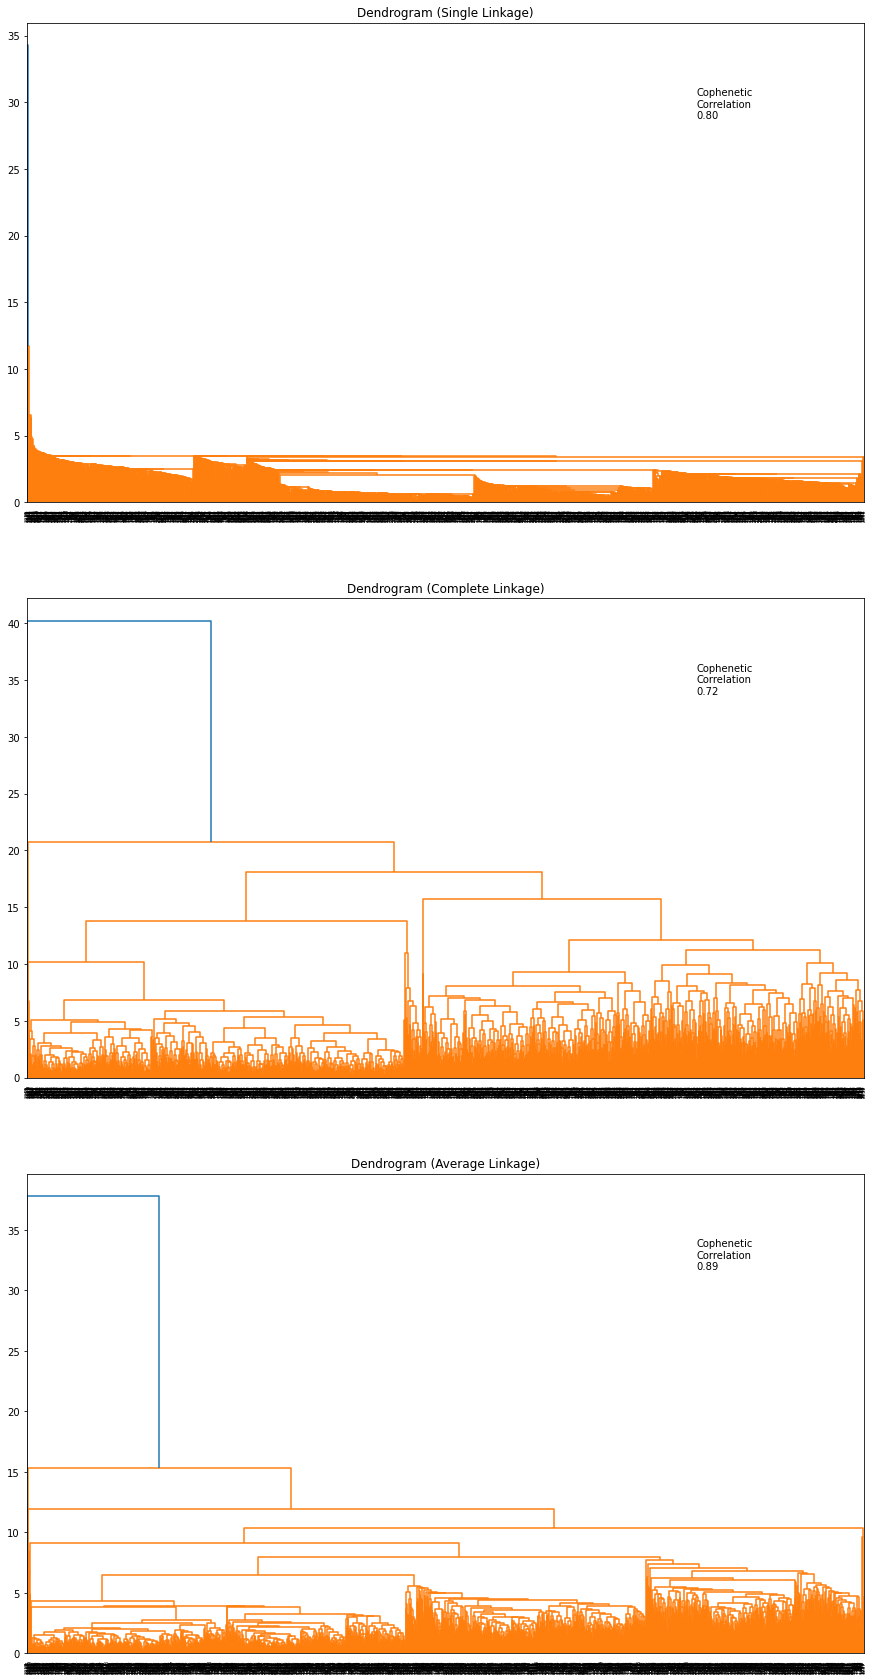

In [100]:
# Plot the dendrogram for Euclidean distance with linkages single, complete and average. 
linkage_methods = ["single", "complete", "average"]

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# To create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))            # Setting the plot size

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(data_pca, metric="euclidean", method=method)                  # Measures the distances between two clusters

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")           # Title of dendrogram

    coph_corr, coph_dist = cophenet(Z, pdist(data_pca))                       # Finding cophenetic correlation for different linkages with city block distance
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations and Insights for Dendograms:**

- It is apparent that the Euclidean distance and average linking provide the better seperated clusters and this is backed up by the strong cophenetic correlation 

**Agglomerative Clustering**

In [101]:
# Initialize Agglomerative Clustering with affinity (distance) as Euclidean, linkage as 'Ward' with clusters=3
HCmodel = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward') 

# Fit on data_pca
HCmodel.fit(data_pca)

AgglomerativeClustering(n_clusters=3)

In [102]:
# Add Agglomerative Clustering cluster labels to data_pca, data_model, whole data

data_pca["HC_5"] = HCmodel.labels_                    

data["HC_5"] = HCmodel.labels_                        

data_model["HC_5"] = HCmodel.labels_ 



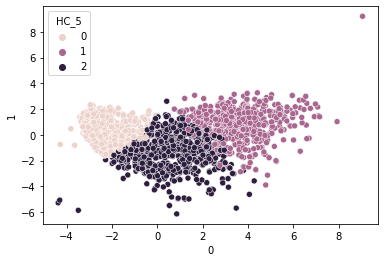

In [103]:
def PCA_PLOT(X, Y, PCA, cluster):
    sns.scatterplot(x=X, y=1, data=PCA, hue=cluster)
PCA_PLOT(0, 1, data_pca, "HC_5")


In [104]:
cluster_profile_HC_5 = data.groupby('HC_5').mean()


In [105]:
cluster_profile_HC_5.style.highlight_max(color="lightgreen", axis=0)


,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Kids,Status,Family_Size,Expenses,NumTotalPurchases,Engaged_in_days,TotalAcceptedCmp,AmountPerPurchase
HC_5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1971.199601,35009.561876,0.750499,0.463074,49.231537,39.990020,4.908184,21.394212,7.062874,5.083832,14.677645,1.858283,2.028942,0.532934,3.239521,6.299401,0.062874,0.013972,0.000000,0.000998,0.001996,0.010978,0.078842,44.800399,1.213573,1.653693,2.867265,93.116766,7.659681,492.619760,0.158683,10.961824
1,1968.211640,75632.331570,0.037037,0.215168,50.742504,629.486772,70.095238,461.047619,102.447972,72.125220,78.728395,1.345679,5.257496,6.015873,8.395062,2.929453,0.082892,0.126984,0.252205,0.215168,0.028219,0.007055,0.282187,47.788360,0.252205,1.622575,1.874780,1413.931217,21.014109,553.864198,0.987654,72.854941
2,1965.952888,56362.922492,0.329787,0.828267,47.539514,429.837386,21.378419,130.037994,28.478723,22.118541,59.240122,3.869301,6.268997,2.936170,7.522796,5.910334,0.080547,0.123100,0.028875,0.031915,0.016717,0.007599,0.144377,50.047112,1.158055,1.650456,2.808511,691.091185,20.597264,594.158055,0.425532,33.144833


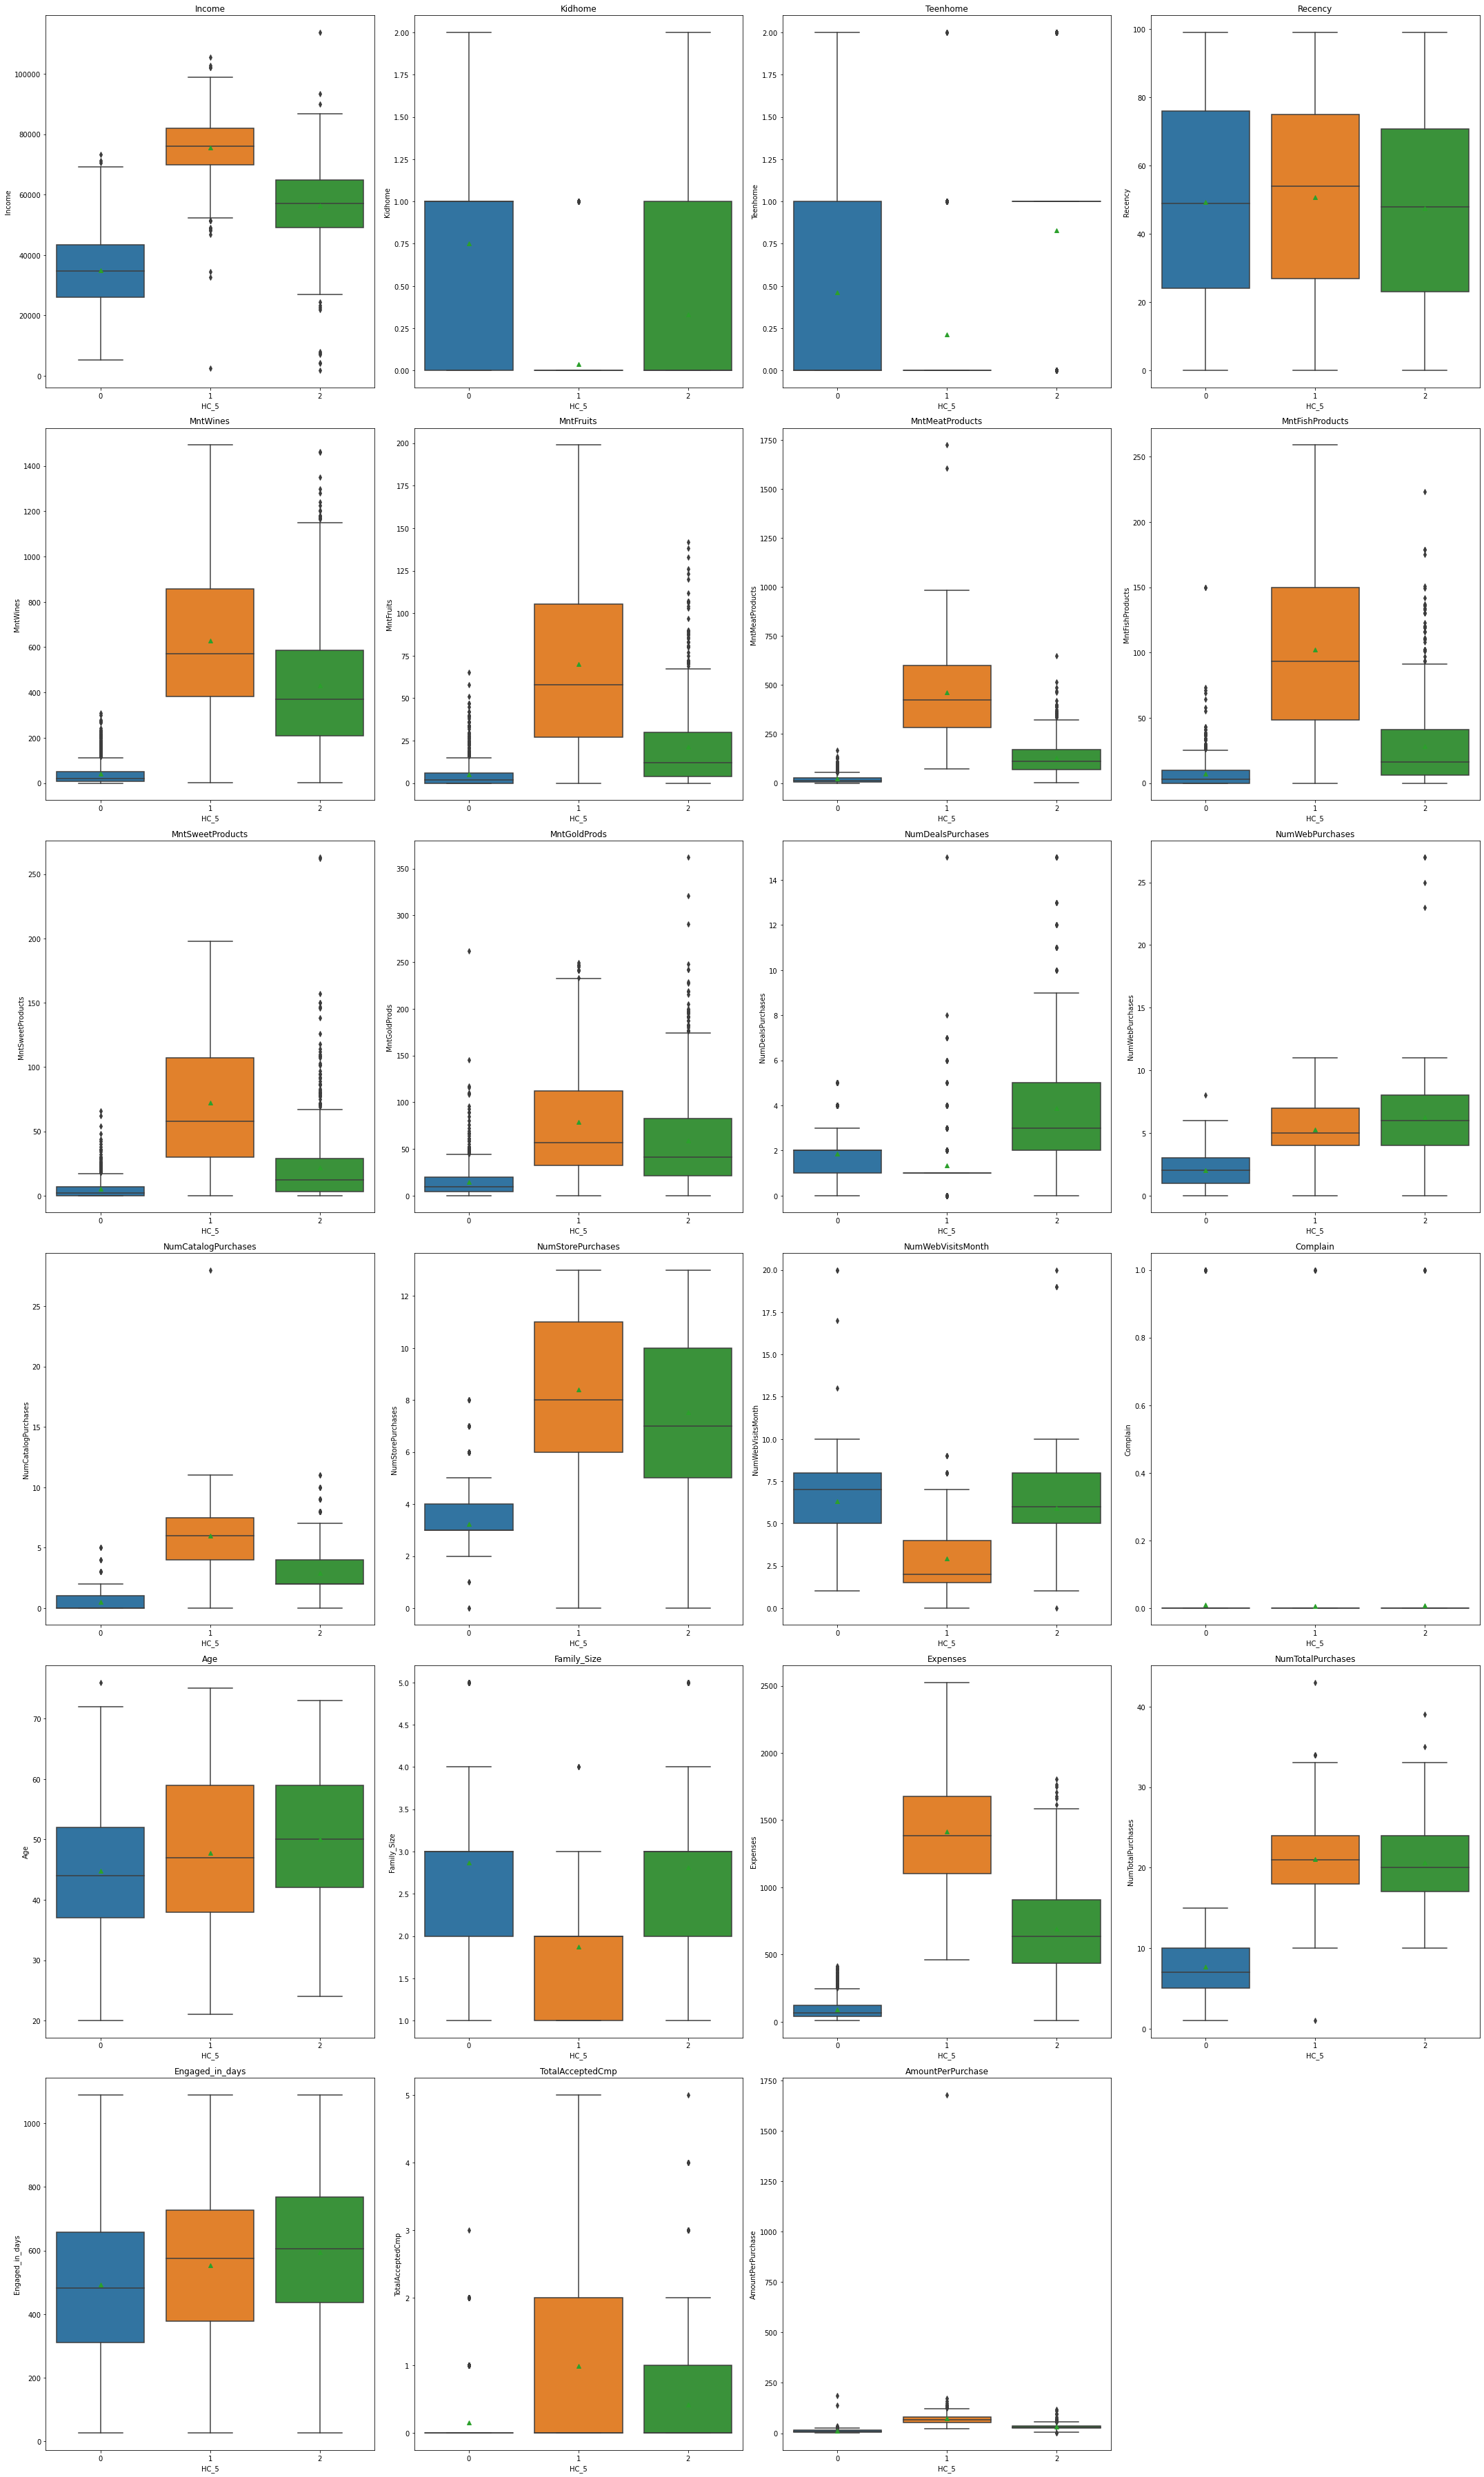

In [106]:
# Creating boxplot for each of the variables
all_col = col_for_box

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)
    
    sns.boxplot(y=data[variable], x=data['HC_5'],showmeans=True)
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()


### **Characteristics of each cluster**


**Cluster 0:High Income**

*Summary for cluster 2: This group had the highest income and were in the middle age between the groups. This group could be categorized as single or married couples without kids due to the kid/teen rate at home being very low and the average total family size being under 2. They bought a lot of meat, wine, gold. They also led the total expenses spent on products by a very wide margin. This is a very important part of the customer base due to their high spending. This group preferred to go to the store or buy off catalog. An area to improve can be internet interaction. *

**Cluster 1:Low level Income**

*Summary for cluster 1:This group was the lowest income and also the youngest of the groups. They bought all products significantly less than the other two groups. This could be due to the presence of young kids and having those responsibilities with low income. They had the most web visits but did not go to the store or buy online much. This could be an area to explore with possible deals to attract them to come to the stores. This group had the lowest campaigns accepted so it is a large area for improvement. *

**Cluster 2: Mid-Level Income Group**

*Summary for cluster 0: This group came in the middle of income and is the oldest of the three clusters. This makes sense also with the fact that they have the most teenagers at home. This group surprisingly led in total purchases due to their internet purchasing/deals used. However, this group accepted campaigns at a very low rate compared to how many purchases were made. Campaigns could target this middle class group more. They spent on wine/gold at a higher rate than expected when looking at all the clusters. *




In [107]:
data_pca.drop(HCmodel.labels_)
data.drop(columns = ['HC_5'], inplace = True , axis = 1 )


## **Gaussian Mixture Model**

In [108]:
sil_score = []                                                             

    # Initialize GMM with number of clusters equal to 5 and random_state=1
gmm = GaussianMixture(n_components = 5, random_state = 1)
gmm.fit(data_pca)
    
    # Fit and predict on the pca data
preds = gmm.predict(data_pca)
    
    # Calculate silhouette score - 
score = silhouette_score(data_pca, preds)
    
    # Append silhouette score to empty list created above
sil_score.append(score)
    
    # Print the silhouette score
print(score) 

0.2930140940868868


## **DBSCAN**

In [111]:
# Initializing lists
eps_value = [2,3,4]                       # Taking random eps value
min_sample_values = [6,20]              # Taking random min_sample value

# Creating a dictionary for each of the values in eps_value with min_sample_values
res = {eps_value[i]: min_sample_values for i in range(len(eps_value))}  

In [112]:
# Finding the silhouette_score for each of the combinations
high_silhouette_avg = 0                                               # Assigning 0 to the high_silhouette_avg variable
high_i_j = [0, 0]                                                     # Assigning 0's to the high_i_j list
key = res.keys()                                                      # Assigning dictionary keys to a variable called key
for i in key:
    z = res[i]                                                        # Assigning dictionary values of each i to z
    for j in z:
        db = DBSCAN(eps=i, min_samples=j).fit(data_pca)               # Applying DBSCAN to each of the combination in dictionary
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
        silhouette_avg = silhouette_score(data_pca, labels)           # Finding silhouette score 
        print( 
            "For eps value =" + str(i),
            "For min sample =" + str(j),
            "The average silhoutte_score is :",
            silhouette_avg,                                          # Printing the silhouette score for each of the combinations
        )
        if high_silhouette_avg < silhouette_avg:                     # If the silhouette score is greater than 0 or the previous score, it will get appended to the high_silhouette_avg list with its combination of i and j              
            high_i_j[0] = i
            high_i_j[1] = j

For eps value =2 For min sample =6 The average silhoutte_score is : 0.10714657168673376
For eps value =2 For min sample =20 The average silhoutte_score is : 0.18739727659026717
For eps value =3 For min sample =6 The average silhoutte_score is : 0.3417584399912617
For eps value =3 For min sample =20 The average silhoutte_score is : 0.3265121393521993
For eps value =4 For min sample =6 The average silhoutte_score is : 0.4352480715510483
For eps value =4 For min sample =20 The average silhoutte_score is : 0.3828830777330792


In [113]:
# Printing the highest silhouette score
print("Highest_silhoutte_avg is {} for eps = {} and min sample = {}".format(high_silhouette_avg, high_i_j[0], high_i_j[1]))

Highest_silhoutte_avg is 0 for eps = 4 and min sample = 20


In [114]:
dbs = DBSCAN(eps=3)

dbs.fit(data_pca)




DBSCAN(eps=3)

In [115]:
data_pca["DB_3"] = dbs.labels_                    

data["DB_3"] = dbs.labels_                        

data_model["DB_3"] = dbs.labels_ 


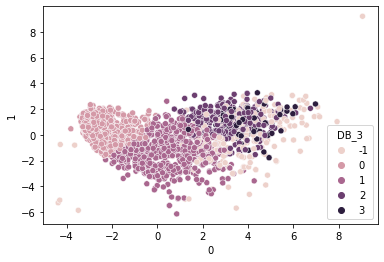

In [116]:

def PCA_PLOT(X, Y, PCA, cluster):
    sns.scatterplot(x=X, y=1, data=PCA, hue=cluster)
PCA_PLOT(0, 1, data_pca, "DB_3")


**Observations and Insights:**
- There are 5 clusters but there is quite a bit of overlap between clusters 1,2, and 3 which makes it hard to clearly see the different groups.